In [95]:
install.packages('Seurat')
library(dplyr)
library(Seurat)
library(patchwork)


Warning message:
"package 'Seurat' is in use and will not be installed"


# Loading the Data

In [96]:
# Load the dataset
scnormal.data <- Read10X(data.dir = "/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/GSE163974_RAW/normal")
sctumor.data <- Read10X(data.dir = "/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/GSE163974_RAW/tumor")

In [97]:
# Initialize the Seurat object with the raw (non-normalized data).
objectN  <- CreateSeuratObject(counts = scnormal.data, project = "SingleCellNormal", min.cells = 3, min.features = 0) #Seurat tutorial recommended parameters: min.cells = 3, min.features = 200 
objectT  <- CreateSeuratObject(counts = sctumor.data, project = "SingleCellTumor", min.cells = 3, min.features = 0)

Warning message:
"Feature names cannot have underscores ('_'), replacing with dashes ('-')"


In [98]:
objectN

An object of class Seurat 
11934 features across 1456 samples within 1 assay 
Active assay: RNA (11934 features, 0 variable features)

In [99]:
objectN@assays$RNA@counts

   [[ suppressing 32 column names 'AAACATTGGCTCCT-1', 'AAACCGTGATCGAC-1', 'AAACGCACCAGAAA-1' ... ]]

   [[ suppressing 32 column names 'AAACATTGGCTCCT-1', 'AAACCGTGATCGAC-1', 'AAACGCACCAGAAA-1' ... ]]

   [[ suppressing 32 column names 'AAACATTGGCTCCT-1', 'AAACCGTGATCGAC-1', 'AAACGCACCAGAAA-1' ... ]]



11934 x 1456 sparse Matrix of class "dgCMatrix"
                                                                                        
FO538757.2     . . . . . .  .  . . . .  . . .  .  .  . . . . .  .  .  . . . . . . .  . .
LINC00115      . . . . . .  .  . . . .  . . .  .  .  . . . . .  .  .  . . . . . . .  . .
NOC2L          . . . . . .  .  . . . .  . . .  .  .  . . . . .  .  .  . . . . . . .  . .
PLEKHN1        . . . . . .  .  . . . .  . . .  .  .  . . . . .  .  .  . . . . . . .  . .
HES4           . . . . . .  .  . . . .  . . .  .  .  . . . . .  .  .  . . . . . . .  . .
ISG15          . . . . . .  1  . . . .  . . .  .  1  . . . . 1  .  .  . . . . . . .  . .
AGRN           . . . . . .  .  . . . .  . . .  .  .  . . . . .  .  .  . . . . . . .  . .
C1orf159       . . . . . .  .  . . . .  . . .  .  .  . . . . .  .  .  . . . . . . .  . .
RP11-465B22.8  . . . . . .  .  . . . .  . . .  .  .  . . . . .  .  .  . . . . . . .  . .
TTLL10         . . . . . .  .  . . . .  . . .  .  .  . . . . .

In [100]:
head(objectN@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACATTGGCTCCT-1,SingleCellNormal,737,385
AAACCGTGATCGAC-1,SingleCellNormal,589,358
AAACGCACCAGAAA-1,SingleCellNormal,514,249
AAACGGCTAAAGTG-1,SingleCellNormal,809,394
AAACGGCTGTATGC-1,SingleCellNormal,668,393
AAAGACGAGACACT-1,SingleCellNormal,1316,628


# Quality Control

## 1. QC using Seurat

### Proportion of Transcripts mapping to mitochondrial, ribosomal and Hb genes

In [7]:
# Calculate the proportion of transcripts mapping to mitochondrial genes
objectN[["percent_mt"]] <- PercentageFeatureSet(objectN, pattern = "^MT-") 
objectT[["percent_mt"]] <- PercentageFeatureSet(objectT, pattern = "^MT-") 

In [8]:
# Calculate the proportion of transcripts mapping to ribosomal RNA
objectN[["percent_ribo"]] <- PercentageFeatureSet(objectN, pattern = "^RP[SL]") 
objectT[["percent_ribo"]] <- PercentageFeatureSet(objectT, pattern = "^RP[SL]")

In [9]:
# Calculate proportion hemoglobin genes, which can give an indication of red blood cell contamination (includes all genes starting with HB except HBP)
objectN[["percent_hb"]] <- PercentageFeatureSet(objectN, pattern = "^HB[^(P)]")
objectN[["percent_plat"]] <- PercentageFeatureSet(objectN, pattern = "PECAM1|PF4")

objectT[["percent_hb"]] <- PercentageFeatureSet(objectT, pattern = "^HB[^(P)]")
objectT[["percent_plat"]] <- PercentageFeatureSet(objectT, pattern = "PECAM1|PF4")

In [10]:
# Optional: Add number of genes per UMI for each cell to metadata
objectN[["log10GenesPerUMI"]] <- log10(objectN$nFeature_RNA) / log10(objectN$nCount_RNA)
objectT[["log10GenesPerUMI"]] <- log10(objectT$nFeature_RNA) / log10(objectT$nCount_RNA)

In [11]:
head(objectN@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACATTGGCTCCT-1,SingleCellNormal,740,388,23.513514,5.675676,0,0,0.9022735
AAACCGTGATCGAC-1,SingleCellNormal,593,362,2.192243,23.946037,0,0,0.9227040
AAACGCACCAGAAA-1,SingleCellNormal,514,249,0.000000,43.190661,0,0,0.8838923
AAACGGCTAAAGTG-1,SingleCellNormal,809,394,1.977750,33.992583,0,0,0.8925523
AAACGGCTGTATGC-1,SingleCellNormal,671,396,4.918033,21.162444,0,0,0.9189778
AAAGACGAGACACT-1,SingleCellNormal,1318,630,1.365706,25.341426,0,0,0.8972489


### Plotting QC features

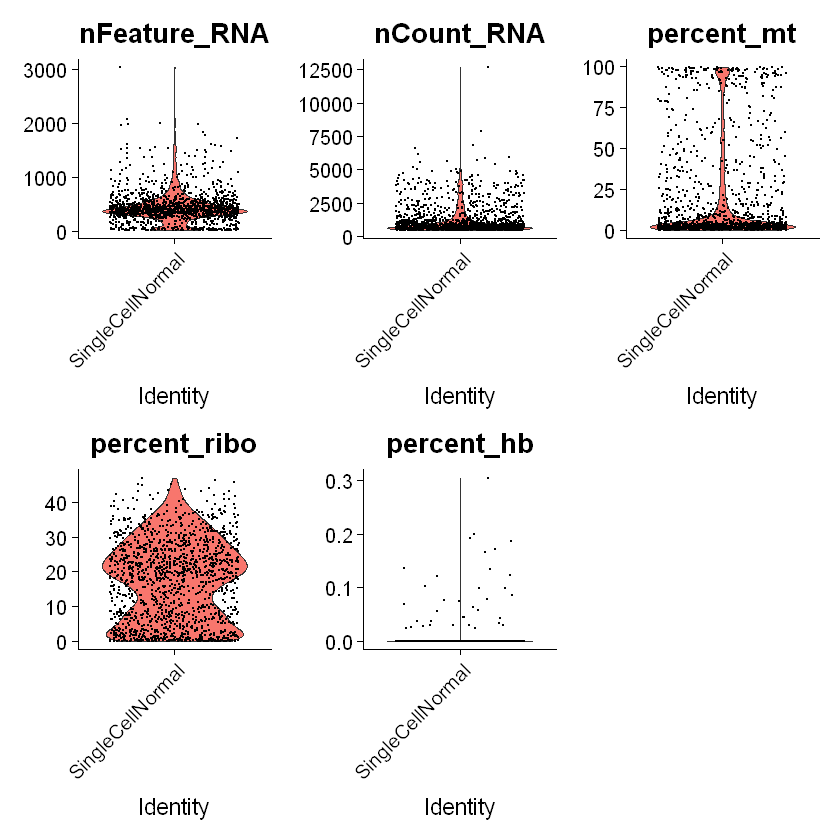

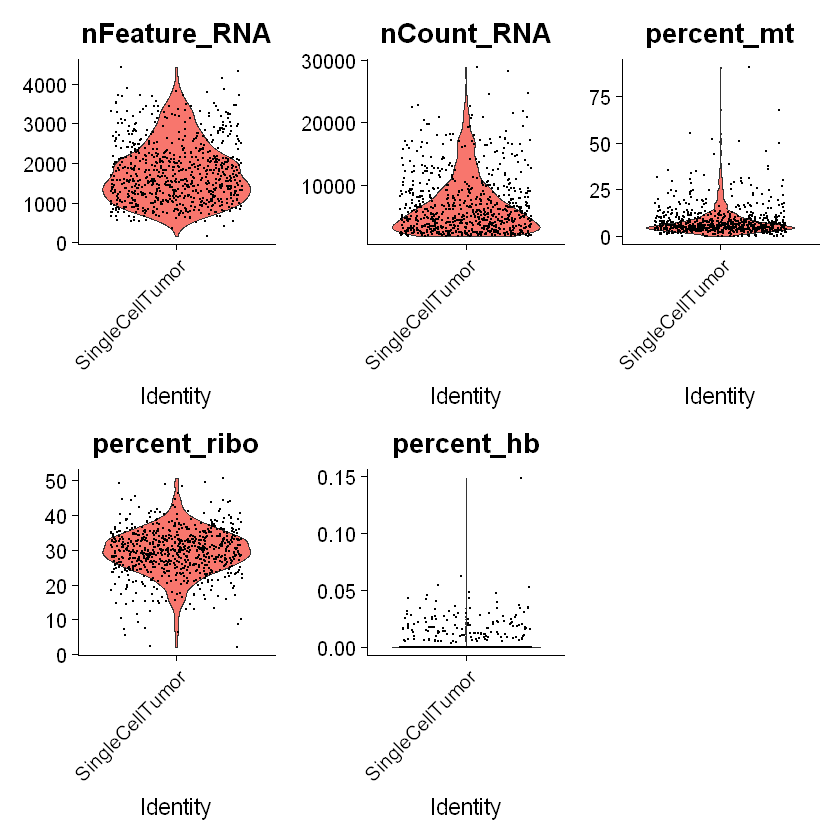

In [12]:
# Plot some of the QC-features as violin plots
feats <- c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_ribo", "percent_hb")
VlnPlot(objectN, group.by = "orig.ident", features = feats, pt.size = 0.1, ncol = 3) + NoLegend()
VlnPlot(objectT, group.by = "orig.ident", features = feats, pt.size = 0.1, ncol = 3) + NoLegend()


some difference in quality for the 2 datasets, with for instance the normal sample having fewer cells with many detected genes and more mitochondrial content. 
As the ribosomal proteins are highly expressed they will make up a larger proportion of the transcriptional landscape when fewer of the lowly expressed genes are detected. And we can plot the different QC-measures as scatter plots.

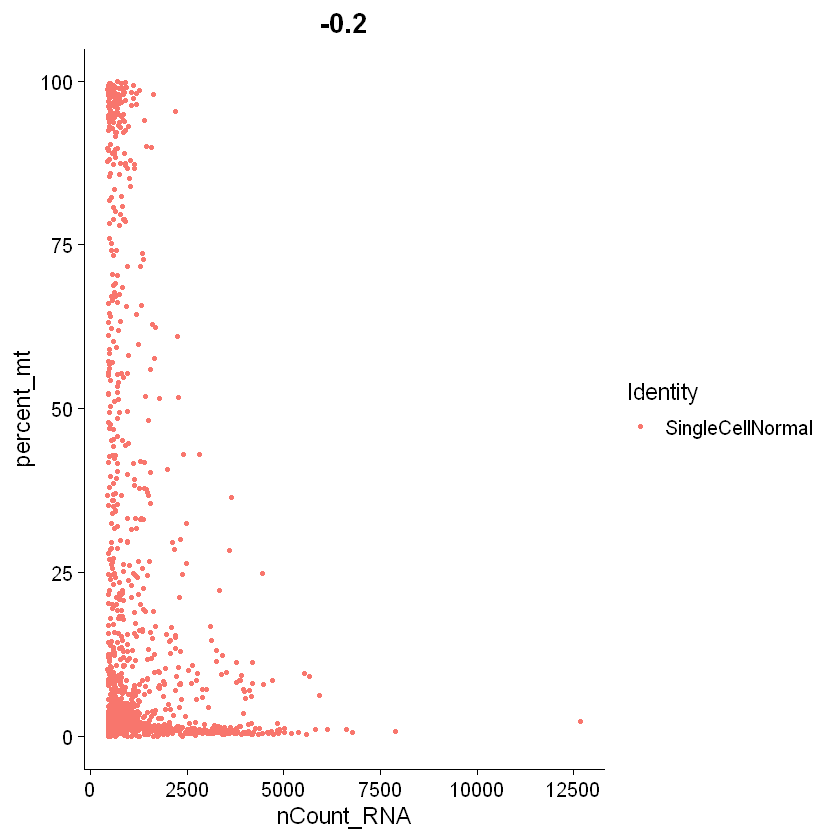

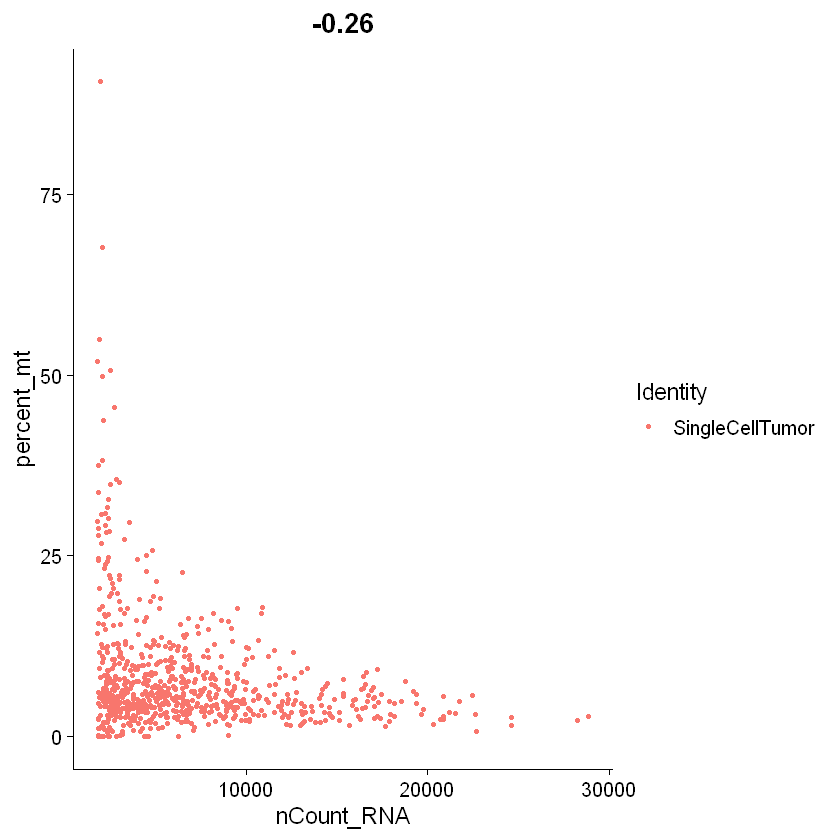

In [23]:
# Visualize number of transcripts per cell vs % mitochondrial RNA
# Cells with a high % of mitochondrial RNA are often dying cells, from which the RNA is leaking. 
# Mitochondrial RNA, however, is contained inside the mitochondria and doesn't leak from the cell.
# Therefore, cells with very high % mt RNA will have a low total RNA count 
plot1 <- FeatureScatter(objectN, feature1 = "nCount_RNA", feature2 = "percent_mt")
plot2 <- FeatureScatter(objectT, feature1 = "nCount_RNA", feature2 = "percent_mt")
plot1 
plot2

These plots show again, that the normal cell dataset contains many dying cells with high %mtRNA and low total RNA count

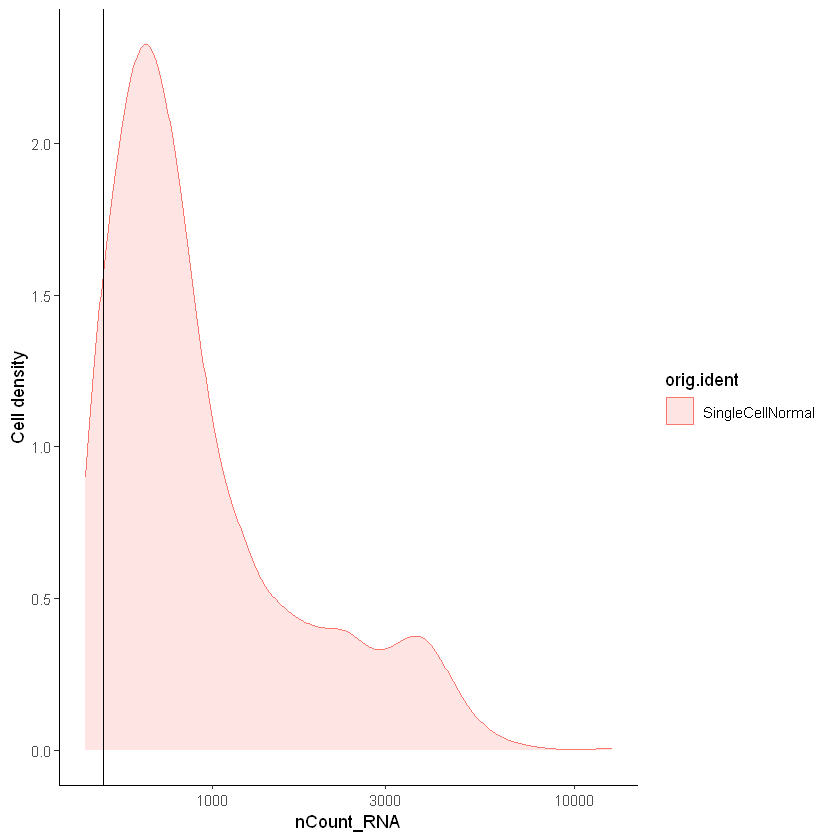

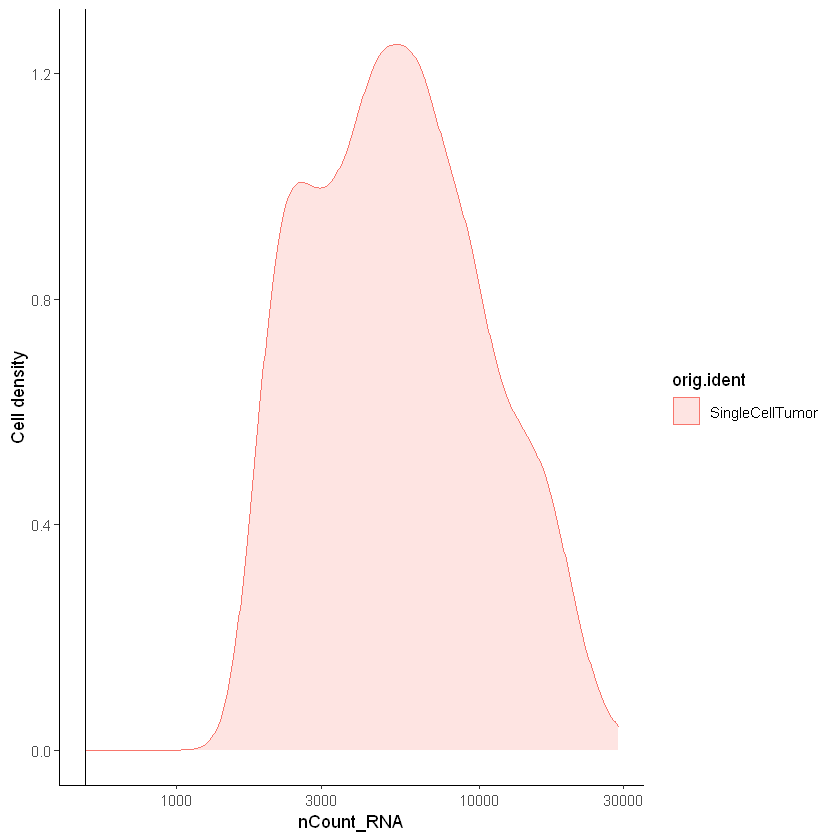

In [20]:
#The UMI counts per cell should generally be above 500, that is the low end of what we expect. 
#If UMI counts are between 500-1000 counts, it is usable but the cells probably should have been sequenced more deeply.

# Visualize the number UMIs/transcripts per cell
library(ggplot2)
objectN@meta.data %>% 
  ggplot(aes(color=orig.ident, x=nCount_RNA , fill= orig.ident)) + geom_density(alpha = 0.2) + scale_x_log10() + theme_classic() +
  ylab("Cell density") + geom_vline(xintercept = 500)

library(ggplot2)
objectT@meta.data %>% 
  ggplot(aes( color=orig.ident, x=nCount_RNA , fill= orig.ident)) + geom_density(alpha = 0.2) + scale_x_log10() + theme_classic() +
  ylab("Cell density") + geom_vline(xintercept = 500)

Most cells in the normal cell dataset have less than 1000 UMIs, which means the cells might have not been sequenced deeply enough.

That majority the tumor cells have 1000 UMIs or greater, which is great.

### Computing and Visualizing genes with highest expression levels *Segment needs work*

In [25]:
# Compute the relative expression of each gene per cell Use sparse matrix operations, 
# if your dataset is large, doing matrix devisions the regular way will take a very long time.
par(mar = c(4, 8, 2, 1))
C <- data.filtN@assays$RNA@counts
C <- Matrix::t(Matrix::t(C)/Matrix::colSums(C)) * 100
most_expressed <- order(apply(C, 1, median), decreasing = T)[20:1]
boxplot(as.matrix(t(C[most_expressed, ])), cex = 0.1, las = 1, xlab = "% total count per cell", 
    col = (scales::hue_pal())(20)[20:1], horizontal = TRUE)
#boxplot(as.matrix(t(CN[most_expressed_N, ])), cex = 0.1, las = 1, xlab = "% total count per cell", 
    #col = (scales::hue_pal())(20)[20:1], horizontal = TRUE)


ERROR: Error in t.default(C[most_expressed, ]): argument is not a matrix


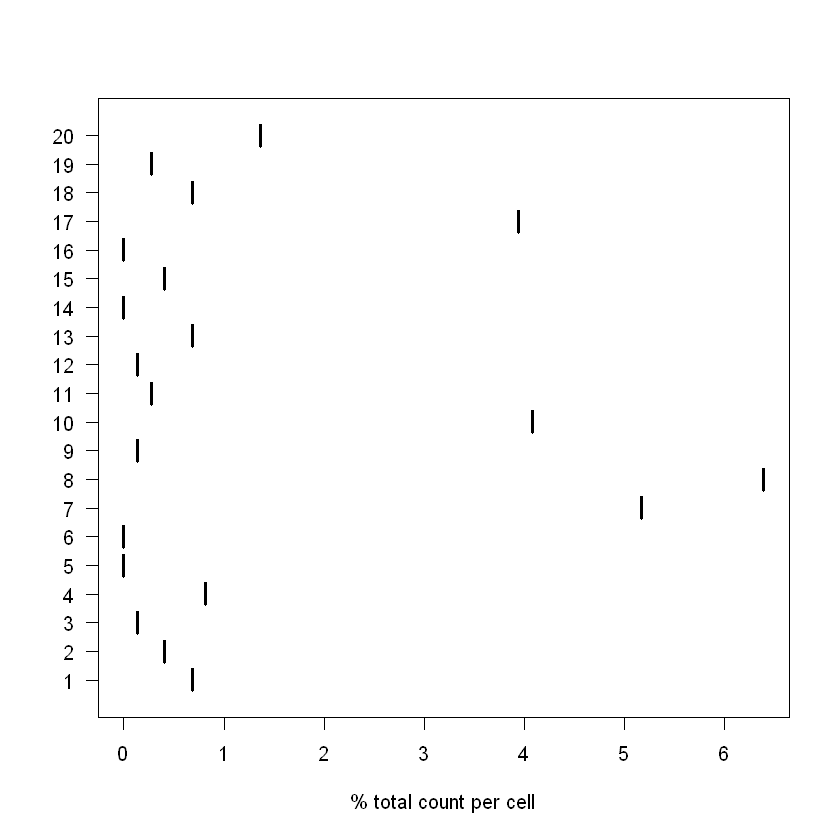

In [27]:
boxplot(as.matrix(t(C[most_expressed])), cex = 0.1, las = 1, xlab = "% total count per cell", 
    col = (scales::hue_pal())(20)[20:1], horizontal = TRUE)

### Filtering cells with very low/ high reads and genes with low counts, as well as cells with high mitochondrial (and low ribosomal) gene exprssion

- low read counts could indicate incomplete capture of the cell content
- high read counts could indicate potential doublet/multiplet (multiple cells in one droplet during scRNA seq)
- high mitochondrial gene expression could indicate cell degradation, resulting in a loss of cytoplasmic mRNAs 

Option 1: Filter out low quality cells using all thresholds together (recommended)

In [ ]:
## Filter out low quality cells using selected thresholds - these will change with experiment
#filtered_object <- subset(x = merged_seurat, 
                         subset= (nUMI >= 500) & 
                           (nGene >= 250) & 
                           (log10GenesPerUMI > 0.80) & 
                           (mitoRatio < 0.20))
                        

In [34]:
data.filtN <- subset(objectN, subset = nFeature_RNA > 200 & nFeature_RNA < 7000 & percent_mt < 5) # official Seurat method
dim(data.filtN)
data.filtT <- subset(objectT, subset = nFeature_RNA > 200 & nFeature_RNA < 25000 & percent_mt < 5) # official Seurat method
dim(data.filtT)

[1] 33694   891

[1] 33694   325

Option 2: Filter out low quality cells using each alone metric alone

In [24]:
# Filter cells with low amount of reads as well as genes that are present in at least a certain amount of cells
# => eg only consider cells with at least 200 detected genes and genes that are expressed in at least 3 cells
#The number of unique genes detected in each cell.
#Low-quality cells or empty droplets will often have very few genes
#Cell doublets or multiplets may exhibit an aberrantly high gene count

#selected_cN <- WhichCells(objectN, expression = nFeature_RNA > 200)
#selected_cT <- WhichCells(objectT, expression = nFeature_RNA > 200)
#selected_fN <- rownames(objectN)[Matrix::rowSums(objectN) > 3]
#selected_fT <- rownames(objectT)[Matrix::rowSums(objectT) > 3]

#data.filtN <- subset(objectN, features = selected_fN, cells = selected_cN)
#dim(data.filtN)
#data.filtT <- subset(objectT, features = selected_fT, cells = selected_cT)
#dim(data.filtT)

[1] 11242  1248

[1] 12916   753

In [ ]:
##mito/ ribo filtering
#selected_mito <- WhichCells(data.filt, expression = percent_mito < 0.2)
#selected_ribo <- WhichCells(data.filt, expression = percent_ribo > 0.05)

##and subset the object to only keep those cells
#data.filt <- subset(data.filt, cells = selected_mito)
#data.filt <- subset(data.filt, cells = selected_ribo)

#dim(data.filt)

#table(data.filt$orig.ident)

### Plot QC stats for filtered data for comparison

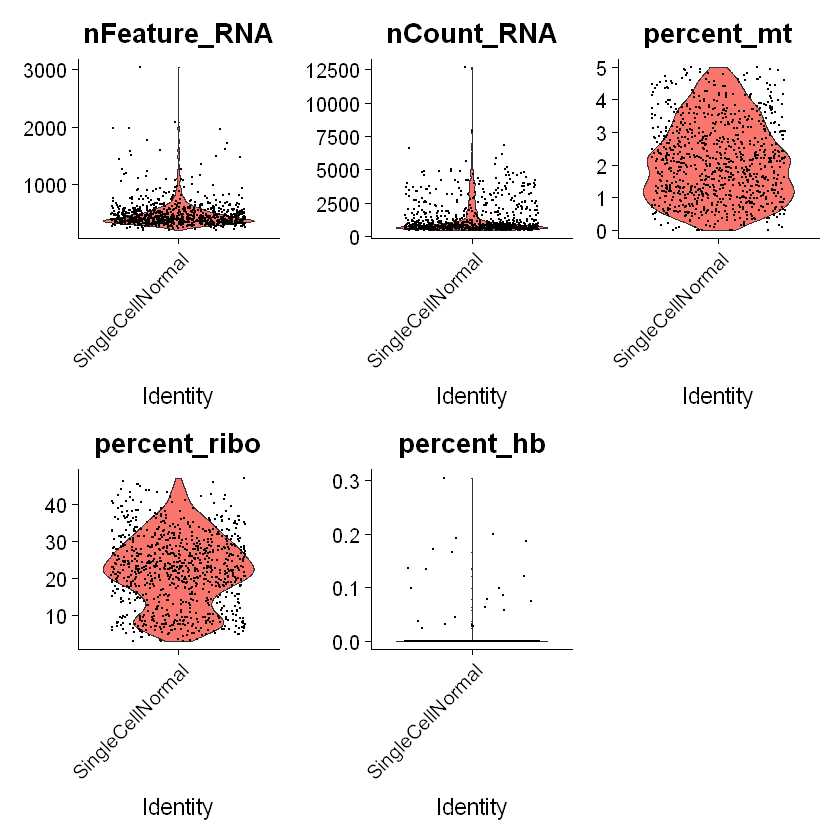

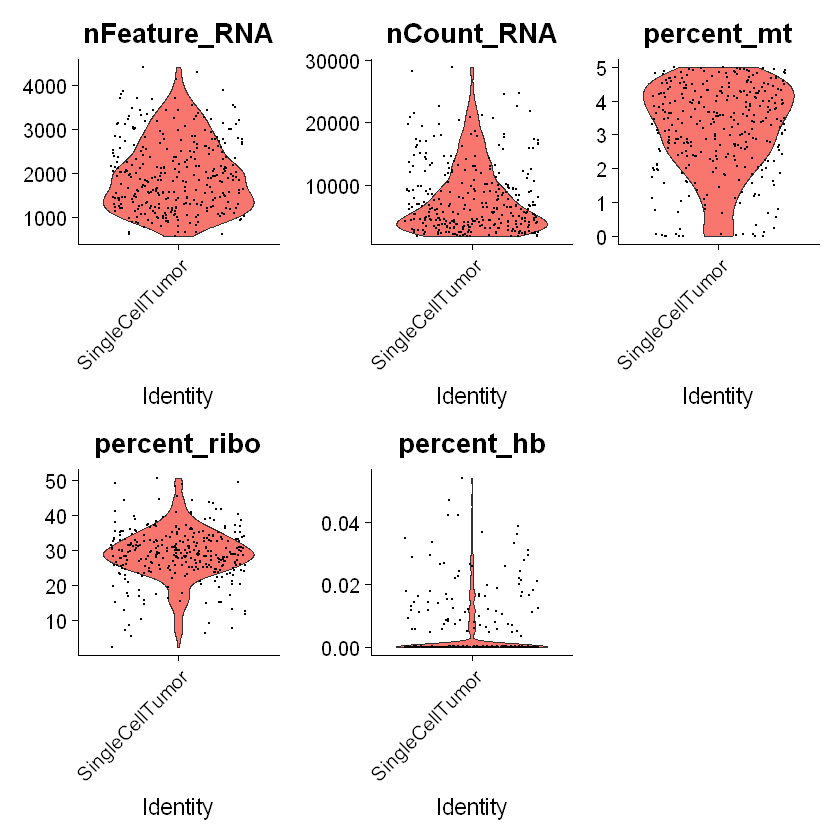

In [37]:
## plot QC stats for filtered data for comparison
feats <- c("nFeature_RNA", "nCount_RNA", "percent_mt", "percent_ribo", "percent_hb")

VlnPlot(data.filtN, group.by = "orig.ident", features = feats, pt.size = 0.1, ncol = 3) + NoLegend()
VlnPlot(data.filtT, group.by = "orig.ident", features = feats, pt.size = 0.1, ncol = 3) + NoLegend()

### Remove mitochondrial / ribosomal / RBCs gene expression (or overly expressed genes)


In [ ]:
## filter  mitochondrial gene expression as they are mainly technical, 
##it can be wise to remove them from the dataset bofore further analysis

#dim(data.filt)

## Filter Mitochondrial
#data.filt <- data.filt[!grepl("^MT-", rownames(data.filt)), ]

##Filter Ribossomal gene (optional if that is a problem on your data) data.filt
# <- data.filt[ ! grepl('^RP[SL]', rownames(data.filt)), ]

## Filter Hemoglobin gene (optional if that is a problem on your data)
#data.filt <- data.filt[!grepl("^HB[^(P)]", rownames(data.filt)), ]

#dim(data.filt)

## 2. QC using Scater

#### Transform Seurat object to SingelCellExperiment

In [101]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("scater")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.16), R 4.0.5 (2021-03-31)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'scater'"
Old packages: 'backports', 'brio', 'deldir', 'diffobj', 'digest', 'fs', 'glue',
  'goftest', 'igraph', 'irlba', 'later', 'lmtest', 'mgcv', 'pbdZMQ',
  'pkgbuild', 'pkgload', 'remotes', 'rlang', 'Seurat', 'SeuratObject',
  'spatstat.core', 'spatstat.geom', 'stringi', 'testthat', 'tibble', 'uuid',
  'uwot', 'xml2'



In [102]:
library(scater)
library(Seurat)
library(patchwork)

In [103]:
objectN.sce <- as.SingleCellExperiment(objectN) # convert seurat objects to single cell experimetns
objectT.sce <- as.SingleCellExperiment(objectT) # convert seurat objects to single cell experimetns

#### Remove doublets 

In [104]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("scDblFinder")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.12 (BiocManager 1.30.16), R 4.0.5 (2021-03-31)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'scDblFinder'"
Old packages: 'backports', 'brio', 'deldir', 'diffobj', 'digest', 'fs', 'glue',
  'goftest', 'igraph', 'irlba', 'later', 'lmtest', 'mgcv', 'pbdZMQ',
  'pkgbuild', 'pkgload', 'remotes', 'rlang', 'Seurat', 'SeuratObject',
  'spatstat.core', 'spatstat.geom', 'stringi', 'testthat', 'tibble', 'uuid',
  'uwot', 'xml2'



In [122]:
library(scDblFinder)
objectN.dbl <- scDblFinder(objectN.sce)
objectT.dbl <- scDblFinder(objectT.sce)

Clustering cells...

6 clusters

Creating ~5000 artifical doublets...

Dimensional reduction

Finding KNN...

Evaluating cell neighborhoods...

Training model...

Finding threshold...

Threshold found:0.884

22 (1.5%) doublets called

Clustering cells...

11 clusters

Creating ~5000 artifical doublets...

Dimensional reduction

Finding KNN...

Evaluating cell neighborhoods...

Training model...

Finding threshold...

Threshold found:0.903

7 (0.9%) doublets called



In [123]:
head(colData(objectN.dbl))

DataFrame with 6 rows and 14 columns
                       orig.ident nCount_RNA nFeature_RNA            ident
                         <factor>  <numeric>    <integer>         <factor>
AAACATTGGCTCCT-1 SingleCellNormal        737          385 SingleCellNormal
AAACCGTGATCGAC-1 SingleCellNormal        589          358 SingleCellNormal
AAACGCACCAGAAA-1 SingleCellNormal        514          249 SingleCellNormal
AAACGGCTAAAGTG-1 SingleCellNormal        809          394 SingleCellNormal
AAACGGCTGTATGC-1 SingleCellNormal        668          393 SingleCellNormal
AAAGACGAGACACT-1 SingleCellNormal       1316          628 SingleCellNormal
                 scDblFinder.cluster scDblFinder.class scDblFinder.score
                           <numeric>          <factor>         <numeric>
AAACATTGGCTCCT-1                   5           singlet        0.00710090
AAACCGTGATCGAC-1                   2           singlet        0.00637371
AAACGCACCAGAAA-1                   2           singlet        0.0208975

In [121]:
class.N =objectN.dbl$scDblFinder.class
n= which(class.N=="doublet")
length(n)

[1] 26

In [119]:
objectN$doublet_class <- class.N
head(objectN@meta.data)
dim(objectN)

,orig.ident,nCount_RNA,nFeature_RNA,doublet_class
,<fct>,<dbl>,<int>,<fct>
AAACATTGGCTCCT-1,SingleCellNormal,737,385,singlet
AAACCGTGATCGAC-1,SingleCellNormal,589,358,singlet
AAACGCACCAGAAA-1,SingleCellNormal,514,249,singlet
AAACGGCTAAAGTG-1,SingleCellNormal,809,394,singlet
AAACGGCTGTATGC-1,SingleCellNormal,668,393,singlet
AAAGACGAGACACT-1,SingleCellNormal,1316,628,singlet


[1] 11934  1456

In [120]:
objectN <- subset(objectN, subset = doublet_class == "singlet")
dim(objectN)

[1] 11934  1430

In [124]:
class.T =objectT.dbl$scDblFinder.class
t= which(class.T=="doublet")
length(t)

[1] 7

In [125]:
objectT$doublet_class <- class.T
head(objectT@meta.data)
dim(objectT)

,orig.ident,nCount_RNA,nFeature_RNA,doublet_class
,<fct>,<dbl>,<int>,<fct>
AAACCGTGGTTGTG-1,SingleCellTumor,16889,3151,singlet
AAACGCTGCCATAG-1,SingleCellTumor,5539,1659,singlet
AAACGGCTCCAACA-1,SingleCellTumor,14130,2877,singlet
AAACGGCTGGTGGA-1,SingleCellTumor,8086,2081,singlet
AAAGAGACACCAGT-1,SingleCellTumor,12695,3252,singlet
AAAGATCTGGTTCA-1,SingleCellTumor,2010,1038,singlet


[1] 13386   754

In [126]:
objectT <- subset(objectT, subset = doublet_class == "singlet")
dim(objectT)

[1] 13386   747

#### Subset mitochondrial genes to use for QC

In [129]:
# convert Seurat object to SingleCellExperiment object after doublet removal
objectN.sce <- as.SingleCellExperiment(objectN) 
objectT.sce <- as.SingleCellExperiment(objectT)
dim(objectN.sce)
dim(objectT.sce)

[1] 11934  1430

[1] 13386   747

In [130]:
mito_genesN <- rownames(objectN)[grep("^MT-", rownames(objectN), ignore.case=TRUE)]   # Mitochondrial genes
# ribo_genesN <- rownames(objectN)[grep("^RP[SL]", rownames(objectN), ignore.case=TRUE)]  # Ribosomal genes
# hb_genesN <- rownames(objectN)[grep("^HB[^(P)]", rownames(objectN), ignore.case=TRUE)]  # Hemoglobin genes - includes all genes starting with HB except HBP.

In [131]:
mito_genesT <- rownames(objectT)[grep("^MT-", rownames(objectT))]   # Mitochondrial genes
# ribo_genesT <- rownames(objectT)[grep("^RP[SL]", rownames(objectT))]  # Ribosomal genes
# hb_genesT <- rownames(objectT)[grep("^HB[^(P)]", rownames(objectT))]  # Hemoglobin genes - includes all genes starting with HB except HBP.

#### Calculate per cell QC metrics

In [132]:
QCN <- addPerCellQC(objectN.sce, flatten = T, subsets = list(mt = mito_genesN)) # , hb = hb_genesN, ribo = ribo_genesN))
QCT <- addPerCellQC(objectT.sce, flatten = T, subsets = list(mt = mito_genesT)) # , hb = hb_genesT, ribo = ribo_genesT))


In [133]:
head(colData(QCN)) # sum: library size for each cell , detected: number of expressed genes, subsets_mt_percent: % of mitochondrial genes for each cell

DataFrame with 6 rows and 14 columns
                       orig.ident nCount_RNA nFeature_RNA doublet_class
                         <factor>  <numeric>    <integer>      <factor>
AAACATTGGCTCCT-1 SingleCellNormal        737          385       singlet
AAACCGTGATCGAC-1 SingleCellNormal        589          358       singlet
AAACGCACCAGAAA-1 SingleCellNormal        514          249       singlet
AAACGGCTAAAGTG-1 SingleCellNormal        809          394       singlet
AAACGGCTGTATGC-1 SingleCellNormal        668          393       singlet
AAAGACGAGACACT-1 SingleCellNormal       1316          628       singlet
                            ident       sum  detected subsets_mt_sum
                         <factor> <numeric> <integer>      <numeric>
AAACATTGGCTCCT-1 SingleCellNormal       737       385            174
AAACCGTGATCGAC-1 SingleCellNormal       589       358             13
AAACGCACCAGAAA-1 SingleCellNormal       514       249              0
AAACGGCTAAAGTG-1 SingleCellNormal       80

In [134]:
colnames(colData(QCN))

[1] "orig.ident"           "nCount_RNA"           "nFeature_RNA"        
 [4] "doublet_class"        "ident"                "sum"                 
 [7] "detected"             "subsets_mt_sum"       "subsets_mt_detected" 
[10] "subsets_mt_percent"   "altexps_RNA_sum"      "altexps_RNA_detected"
[13] "altexps_RNA_percent"  "total"

#### Identify outlier cells
*NOTE: 
According to Germain, Sonrel & Robinson, 2020 (https://www.biorxiv.org/content/10.1101/2020.02.02.930578v3.full),
outlier cells should be chosen according to at least two of the following thresholds: log10_total_counts(sum) >2.5 MADs or <5 MADs, log10_total_features(detected) >2.5 MADs or <5 MADs, pct_counts_in_top_20_features(no longer calculated) > or < 5 MADs, featcount_dist (no longer calculated)(distance to expected ratio of log10 counts and features) > or < 5 MADs, pct_counts_Mt (subsets_mt_percent) > 2.5 MADs and > 0.08.*

*NB: Removal of mitochondiral or ribosomal genes did not appear beneficial.

In [135]:
nmad_low_feature <- 5
nmad_high_feature <- 2.5
nmad_low_UMI <- 5
nmad_high_UMI <- 2.5
nmad_high_mito <- 2.5

In [136]:
feature.low.N <- isOutlier(QCN$detected, nmads = nmad_low_feature, type = "lower", log = TRUE)
feature.high.N <- isOutlier(QCN$detected, nmads = nmad_high_feature, type = "higher", log = TRUE)
sum(feature.low.N)  # how many TRUE (outliers)
sum(feature.high.N)
feature.outlier.N = as.logical(feature.low.N +feature.high.N )
sum(feature.outlier.N)

[1] 113

[1] 51

[1] 164

In [137]:
feature.low.T <- isOutlier(QCT$detected, nmads = nmad_low_feature, type = "lower", log = TRUE)
feature.high.T <- isOutlier(QCT$detected, nmads = nmad_high_feature, type = "higher", log = TRUE)
sum(feature.low.T)  # how many TRUE (outliers)
sum(feature.high.T)
feature.outlier.T = as.logical(feature.low.T +feature.high.T )
sum(feature.outlier.T)

[1] 0

[1] 0

[1] 0

In [138]:
UMI.low.N <- isOutlier(QCN$sum, nmads = nmad_low_UMI, type = "lower", log = TRUE)
UMI.high.N <- isOutlier(QCN$sum, nmads = nmad_high_UMI, type = "higher", log = TRUE)
sum(UMI.low.N)  # how many TRUE (outliers)
sum(UMI.high.N)
UMI.outlier.N = as.logical(UMI.low.N +UMI.high.N )
sum(UMI.outlier.N)

[1] 0

[1] 187

[1] 187

In [139]:
UMI.low.T <- isOutlier(QCT$sum, nmads = nmad_low_UMI, type = "lower", log = TRUE)
UMI.high.T <- isOutlier(QCT$sum, nmads = nmad_high_UMI, type = "higher", log = TRUE)
sum(UMI.low.T)  # how many TRUE (outliers)
sum(UMI.high.T)
UMI.outlier.T = as.logical(UMI.low.T +UMI.high.T )
sum(UMI.outlier.T)

[1] 0

[1] 0

[1] 0

In [140]:
mit.outlier.N <- isOutlier(QCN$subsets_mt_percent, nmads = nmad_high_mito, type = "higher")
sum(mit.outlier.N)  # how many TRUE (outliers)


[1] 409

In [141]:
mit.outlier.T <- isOutlier(QCT$subsets_mt_percent, nmads = nmad_high_mito, type = "higher")
sum(mit.outlier.T)  # how many TRUE (outliers)

[1] 84

In [143]:
# creating meta data dataframe
metaDataN <- data.frame("percent.mito"=QCN$subsets_mt_percent )
metaDataN$feature_outliers <- feature.outlier.N
metaDataN$UMI_outliers <- UMI.outlier.N
metaDataN$mit_outliers <- mit.outlier.N
metaDataN$final_outliers <- feature.outlier.N | mit.outlier.N | UMI.outlier.N
head(metaDataN)

,percent.mito,feature_outliers,UMI_outliers,mit_outliers,final_outliers
,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,23.609227,FALSE,FALSE,TRUE,TRUE
2,2.207131,FALSE,FALSE,FALSE,FALSE
3,0.000000,FALSE,FALSE,FALSE,FALSE
4,1.977750,FALSE,FALSE,FALSE,FALSE
5,4.940120,FALSE,FALSE,FALSE,FALSE
6,1.367781,FALSE,FALSE,FALSE,FALSE


In [144]:
metaDataT <- data.frame("percent.mito"=QCT$subsets_mt_percent )
metaDataT$feature_outliers <- feature.outlier.T
metaDataT$UMI_outliers <- UMI.outlier.T
metaDataT$mit_outliers <- mit.outlier.T
metaDataT$final_outliers <- feature.outlier.T | mit.outlier.T | UMI.outlier.T
head(metaDataT)

,percent.mito,feature_outliers,UMI_outliers,mit_outliers,final_outliers
,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>
1,6.418379,FALSE,FALSE,FALSE,FALSE
2,5.759162,FALSE,FALSE,FALSE,FALSE
3,5.796178,FALSE,FALSE,FALSE,FALSE
4,8.558001,FALSE,FALSE,FALSE,FALSE
5,6.081134,FALSE,FALSE,FALSE,FALSE
6,5.721393,FALSE,FALSE,FALSE,FALSE


#### Visualizing QC metrics

In [145]:
library(ggplot2)
library(cowplot)


Attaching package: 'cowplot'


The following object is masked from 'package:patchwork':

    align_plots




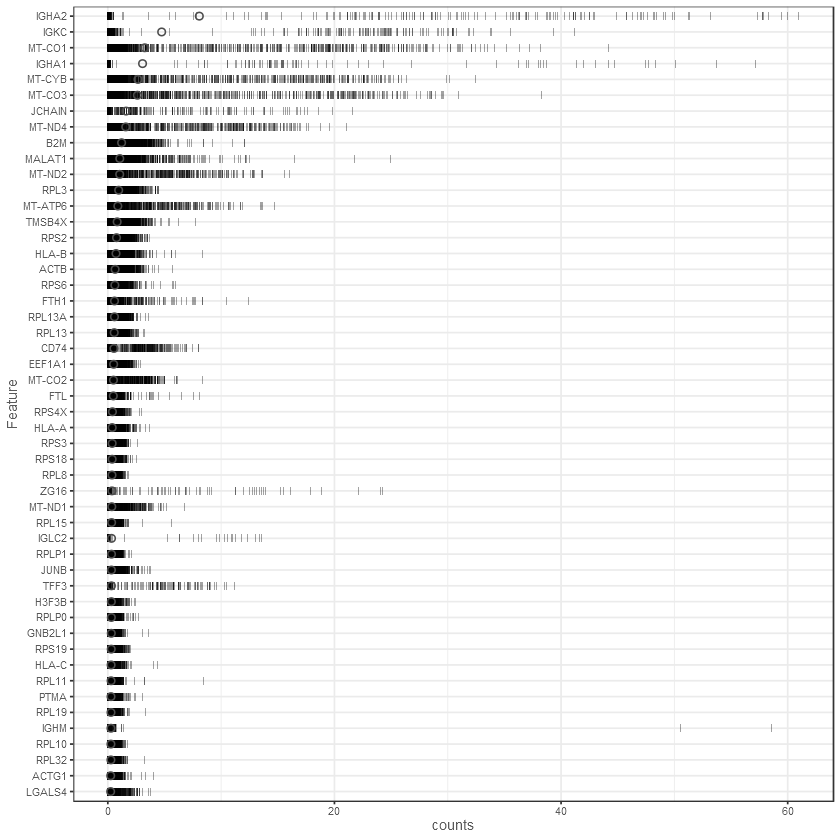

In [146]:
plotHighestExprs(QCN)
#Plot shows  top 50 most-expressed features
#Each row  corresponds to a gene, and each bar corresponds to the expression of the gene in a single cell
#Circls indicate median expression of each gene
#Expected genes: mitochondrial genes, actin, ribosomal protein, MALAT1
#many of the highest expressed genes in the normal data set appear to code for immunoglobulin chains

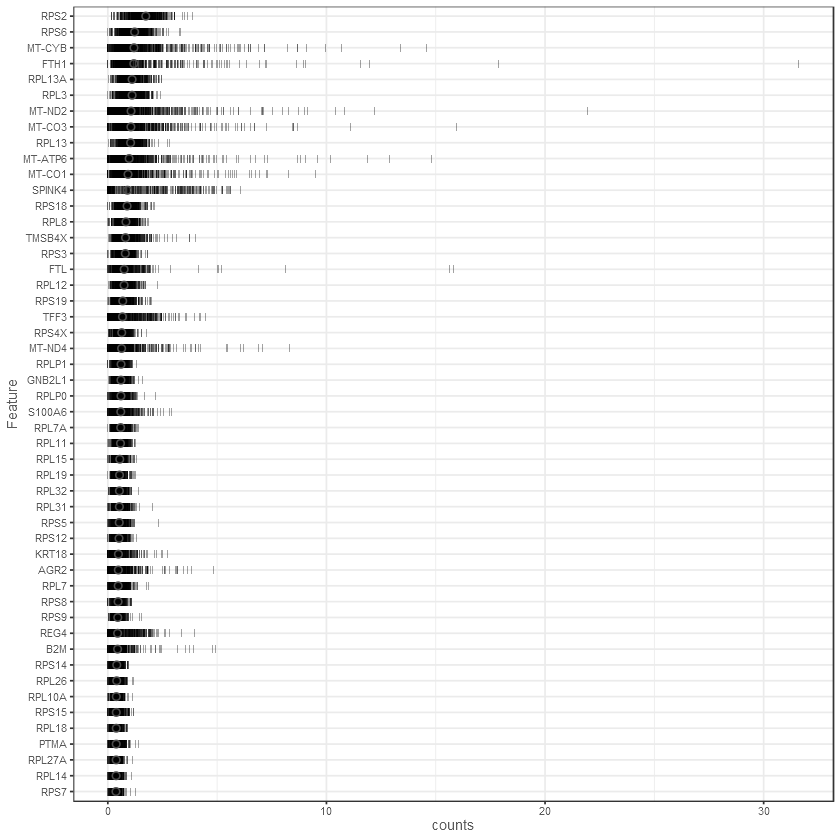

In [200]:
plotHighestExprs(QCT)
#most of the genes coding for immunoglobulin chains that appeared in the normal dataset are absent from the tumor dataset

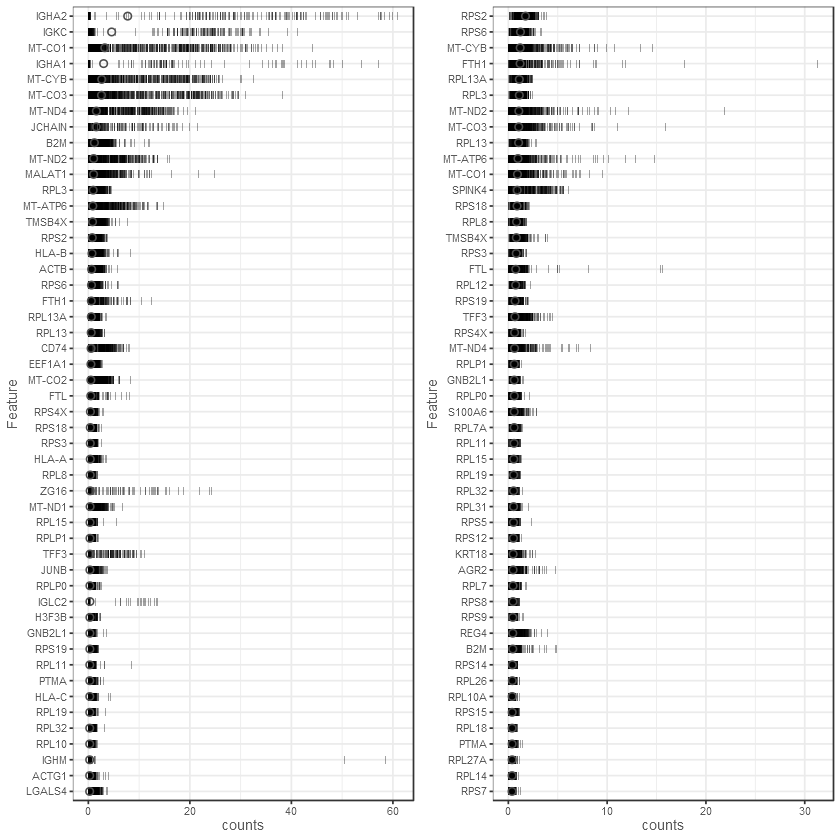

In [134]:
plotN = plotHighestExprs(QCN)
plotT = plotHighestExprs(QCT)
plot_grid(plotN, plotT, ncol = 2)

In [147]:
QCN$outlier <- metaDataN$final_outliers
colnames(colData(QCN))
QCT$outlier <- metaDataT$final_outliers
colnames(colData(QCT))

[1] "orig.ident"           "nCount_RNA"           "nFeature_RNA"        
 [4] "doublet_class"        "ident"                "sum"                 
 [7] "detected"             "subsets_mt_sum"       "subsets_mt_detected" 
[10] "subsets_mt_percent"   "altexps_RNA_sum"      "altexps_RNA_detected"
[13] "altexps_RNA_percent"  "total"                "outlier"

[1] "orig.ident"           "nCount_RNA"           "nFeature_RNA"        
 [4] "doublet_class"        "ident"                "sum"                 
 [7] "detected"             "subsets_mt_sum"       "subsets_mt_detected" 
[10] "subsets_mt_percent"   "altexps_RNA_sum"      "altexps_RNA_detected"
[13] "altexps_RNA_percent"  "total"                "outlier"

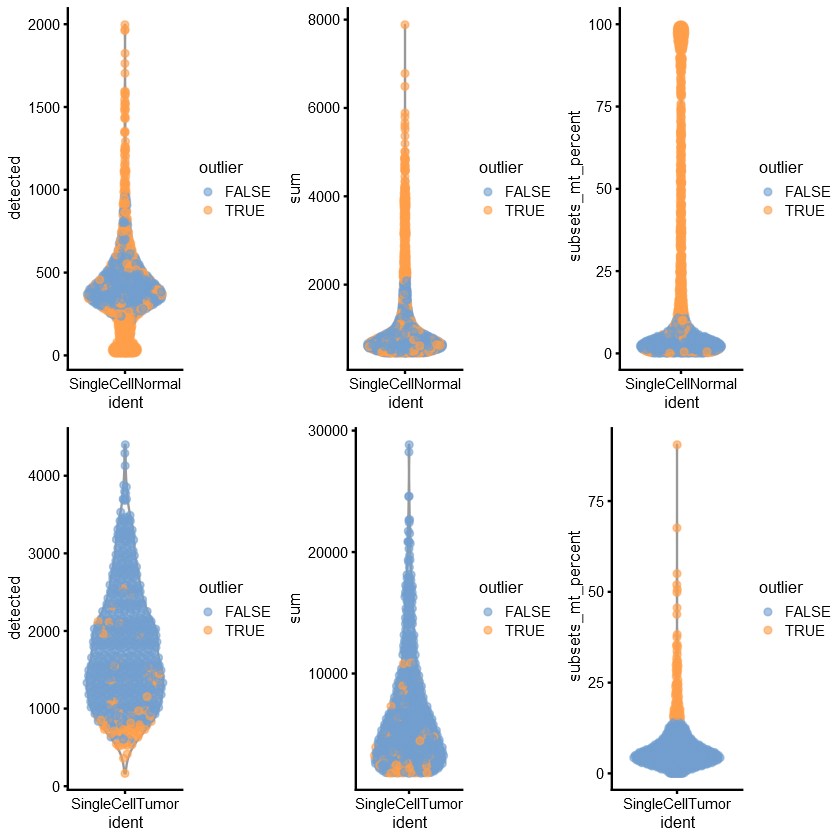

In [148]:
# plot QC metrics violin plots 
plot_grid(plotColData(QCN, y = "detected", x = "ident", colour_by = "outlier"), 
          plotColData(QCN, y = "sum", x = "ident", colour_by = "outlier"), 
          plotColData(QCN, y = "subsets_mt_percent", x = "ident", colour_by = "outlier"),
          plotColData(QCT, y = "detected", x = "ident", colour_by = "outlier"), 
          plotColData(QCT, y = "sum", x = "ident", colour_by = "outlier"), 
          plotColData(QCT, y = "subsets_mt_percent", x = "ident", colour_by = "outlier") ,ncol = 3)

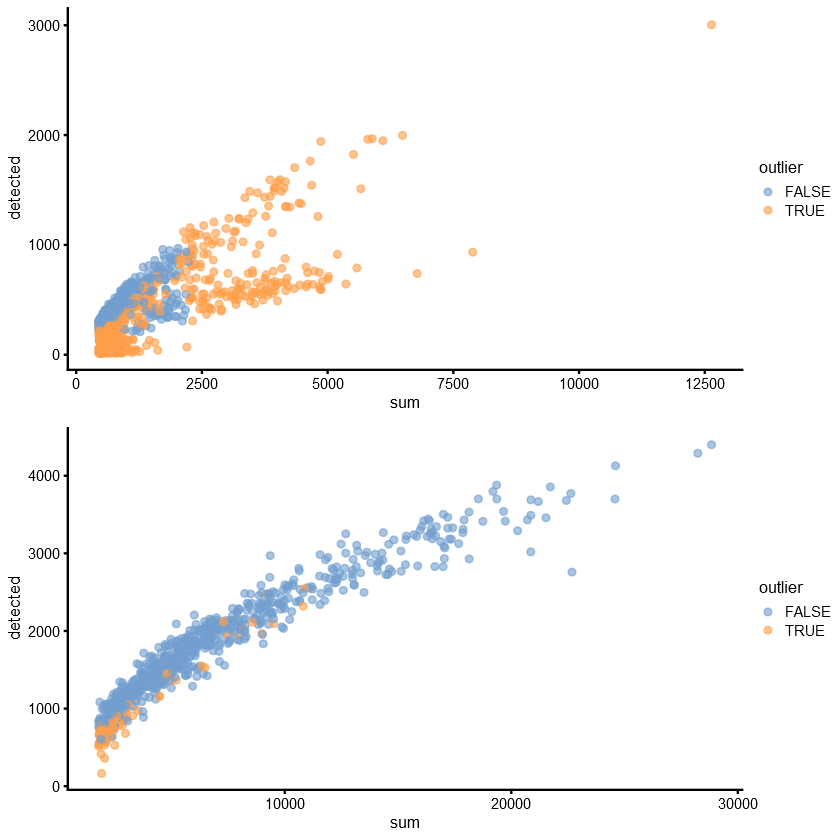

In [87]:
plot_grid( plotColData(QCN, x = "sum", y = "detected", colour_by = "outlier"),
          plotColData(QCT, x = "sum", y = "detected", colour_by = "outlier")
          ,ncol = 1)

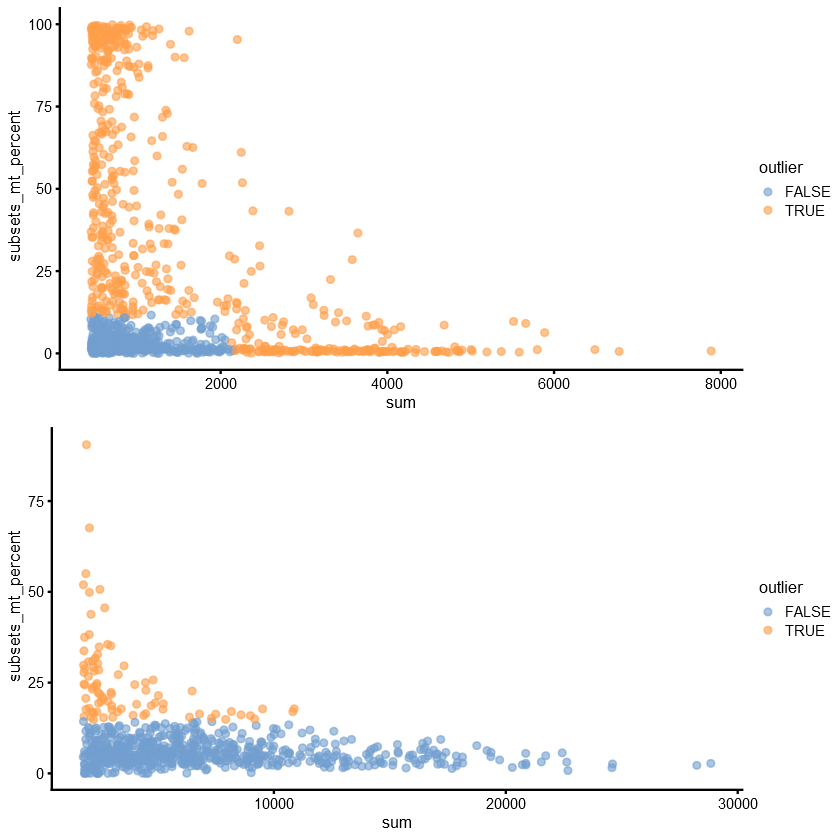

In [149]:
plot_grid( plotColData(QCN, x = "sum", y = "subsets_mt_percent", colour_by = "outlier"),
          plotColData(QCT, x = "sum", y = "subsets_mt_percent", colour_by = "outlier")
          ,ncol = 1)

#### Filtering the cells

In [150]:
objectN$feature_outliers <- feature.outlier.N
objectN$UMI_outliers <- UMI.outlier.N
objectN$mit_outliers <- mit.outlier.N
objectN$final_outliers <- feature.outlier.N | mit.outlier.N | UMI.outlier.N
head(objectN@meta.data)

objectT$feature_outliers <- feature.outlier.T
objectT$UMI_outliers <- UMI.outlier.T
objectT$mit_outliers <- mit.outlier.T
objectT$final_outliers <- feature.outlier.T | mit.outlier.T | UMI.outlier.T
head(objectT@meta.data)



,orig.ident,nCount_RNA,nFeature_RNA,doublet_class,feature_outliers,UMI_outliers,mit_outliers,final_outliers
,<fct>,<dbl>,<int>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>
AAACATTGGCTCCT-1,SingleCellNormal,737,385,singlet,FALSE,FALSE,TRUE,TRUE
AAACCGTGATCGAC-1,SingleCellNormal,589,358,singlet,FALSE,FALSE,FALSE,FALSE
AAACGCACCAGAAA-1,SingleCellNormal,514,249,singlet,FALSE,FALSE,FALSE,FALSE
AAACGGCTAAAGTG-1,SingleCellNormal,809,394,singlet,FALSE,FALSE,FALSE,FALSE
AAACGGCTGTATGC-1,SingleCellNormal,668,393,singlet,FALSE,FALSE,FALSE,FALSE
AAAGACGAGACACT-1,SingleCellNormal,1316,628,singlet,FALSE,FALSE,FALSE,FALSE


,orig.ident,nCount_RNA,nFeature_RNA,doublet_class,feature_outliers,UMI_outliers,mit_outliers,final_outliers
,<fct>,<dbl>,<int>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>
AAACCGTGGTTGTG-1,SingleCellTumor,16889,3151,singlet,FALSE,FALSE,FALSE,FALSE
AAACGCTGCCATAG-1,SingleCellTumor,5539,1659,singlet,FALSE,FALSE,FALSE,FALSE
AAACGGCTCCAACA-1,SingleCellTumor,14130,2877,singlet,FALSE,FALSE,FALSE,FALSE
AAACGGCTGGTGGA-1,SingleCellTumor,8086,2081,singlet,FALSE,FALSE,FALSE,FALSE
AAAGAGACACCAGT-1,SingleCellTumor,12695,3252,singlet,FALSE,FALSE,FALSE,FALSE
AAAGATCTGGTTCA-1,SingleCellTumor,2010,1038,singlet,FALSE,FALSE,FALSE,FALSE


In [151]:
data.filtN <- subset(objectN, subset = final_outliers == "FALSE")
dim(objectN)
dim(data.filtN)

[1] 11934  1430

[1] 11934   854

In [180]:
data.filtT <- subset(objectT, subset = final_outliers == "FALSE")
dim(objectT)
dim(data.filtT)


[1] 33694   754

[1] 33694   670

#### Plotting QC metrics after filtration

In [152]:
data.filtN.sce <- as.SingleCellExperiment(data.filtN)
data.filtN.sce <- addPerCellQC(data.filtN.sce, flatten = T, subsets = list(mt = mito_genesN))

data.filtT.sce <- as.SingleCellExperiment(data.filtT)
data.filtT.sce <- addPerCellQC(data.filtT.sce, flatten = T, subsets = list(mt = mito_genesT))
head(colData(data.filtN.sce))

DataFrame with 6 rows and 18 columns
                       orig.ident nCount_RNA nFeature_RNA doublet_class
                         <factor>  <numeric>    <integer>      <factor>
AAACCGTGATCGAC-1 SingleCellNormal        589          358       singlet
AAACGCACCAGAAA-1 SingleCellNormal        514          249       singlet
AAACGGCTAAAGTG-1 SingleCellNormal        809          394       singlet
AAACGGCTGTATGC-1 SingleCellNormal        668          393       singlet
AAAGACGAGACACT-1 SingleCellNormal       1316          628       singlet
AAAGCAGAACTAGC-1 SingleCellNormal       1514          588       singlet
                 feature_outliers UMI_outliers mit_outliers final_outliers
                        <logical>    <logical>    <logical>      <logical>
AAACCGTGATCGAC-1            FALSE        FALSE        FALSE          FALSE
AAACGCACCAGAAA-1            FALSE        FALSE        FALSE          FALSE
AAACGGCTAAAGTG-1            FALSE        FALSE        FALSE          FALSE
AAACGGCTGTAT

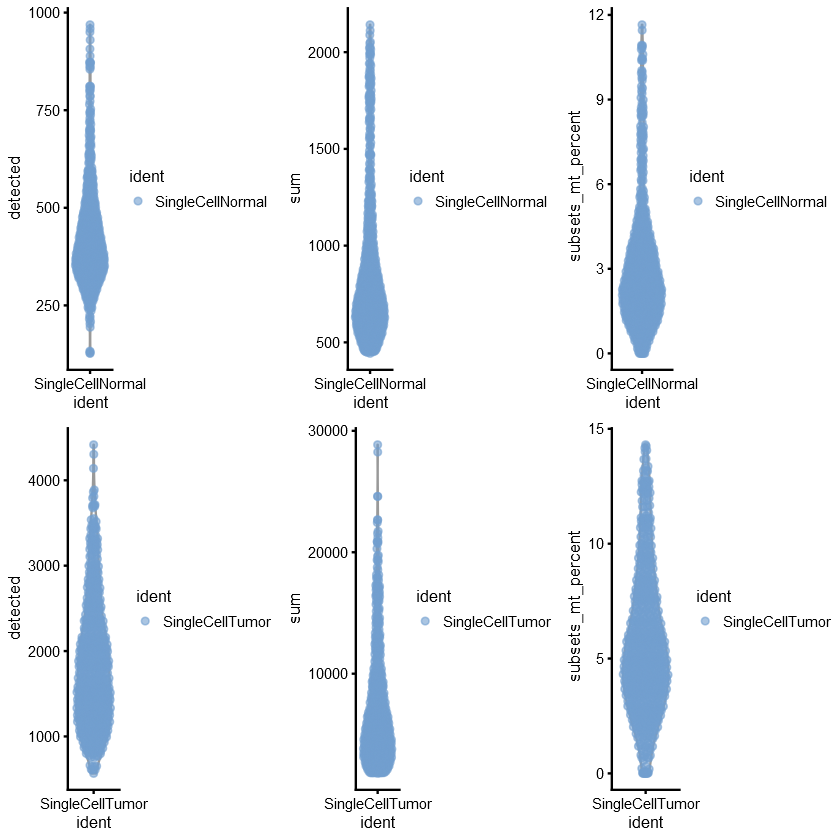

In [153]:
plot_grid(plotColData(data.filtN.sce, y = "detected", x = "ident", colour_by = "ident"), 
          plotColData(data.filtN.sce, y = "sum", x = "ident", colour_by = "ident"), 
          plotColData(data.filtN.sce, y = "subsets_mt_percent", x = "ident", colour_by = "ident"),
          plotColData(data.filtT.sce, y = "detected", x = "ident", colour_by = "ident"), 
          plotColData(data.filtT.sce, y = "sum", x = "ident", colour_by = "ident"), 
          plotColData(data.filtT.sce, y = "subsets_mt_percent", x = "ident", colour_by = "ident") ,ncol = 3)

## Saving QC filtered data

In [154]:
dir.create("C:/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/results", showWarnings = F)

saveRDS(data.filtN, "C:/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/results/CRCN_qc.rds")
saveRDS(data.filtT, "C:/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/results/CRCT_qc.rds")


# Normalize Data

Visualize data before normalization

In [7]:
filename <- file.choose()
data.filtN <- readRDS(filename)

In [155]:
data.filtN

An object of class Seurat 
11934 features across 854 samples within 1 assay 
Active assay: RNA (11934 features, 0 variable features)

In [9]:
filename <- file.choose()
data.filtT <- readRDS(filename)

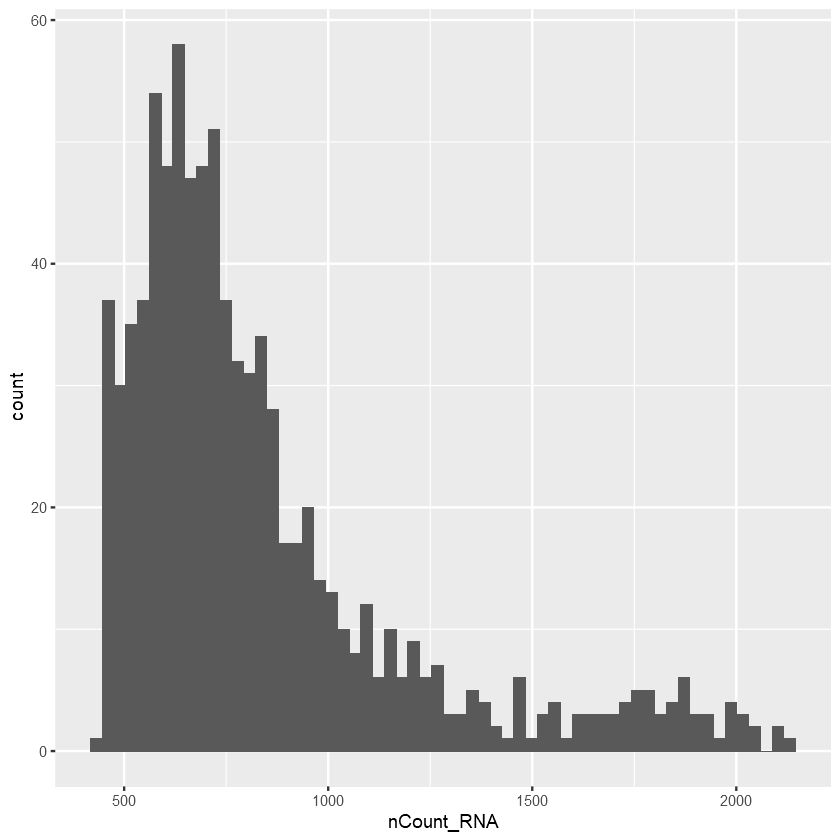

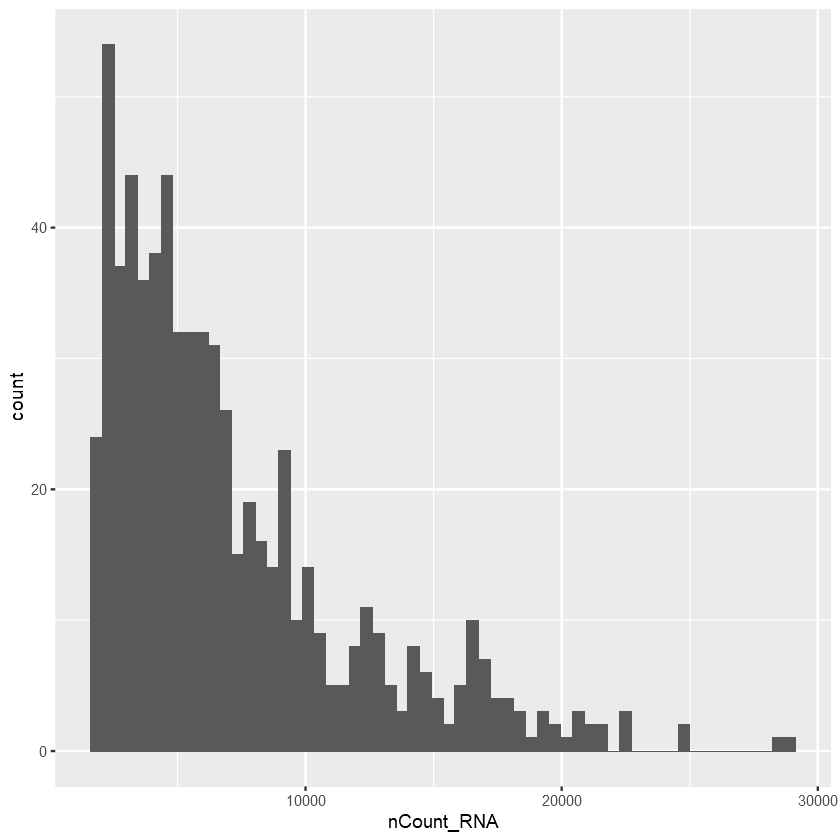

In [156]:
library(ggplot2)
ggplot(data.filtN@meta.data,aes(nCount_RNA))+ geom_histogram(bins=60)
ggplot(data.filtT@meta.data,aes(nCount_RNA))+ geom_histogram(bins=60)

Data is spread over a large range of RNA counts, showing high variabilty

Normalize data

In [157]:
#Normalize data
data.filtN <- NormalizeData(data.filtN)
data.filtT <- NormalizeData(data.filtT)

Visualize data after normalization

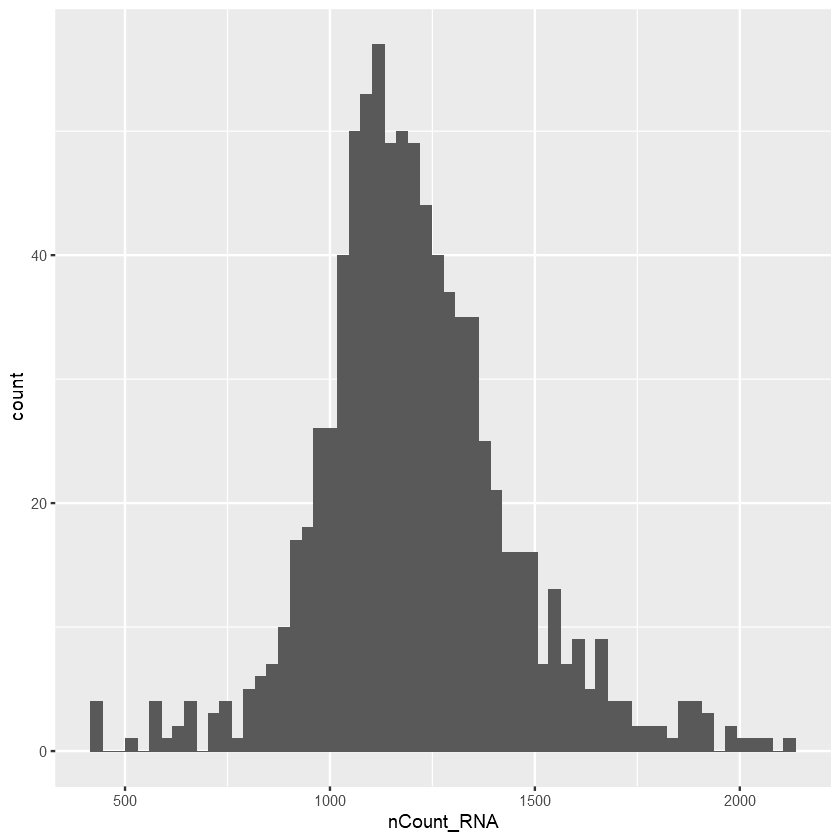

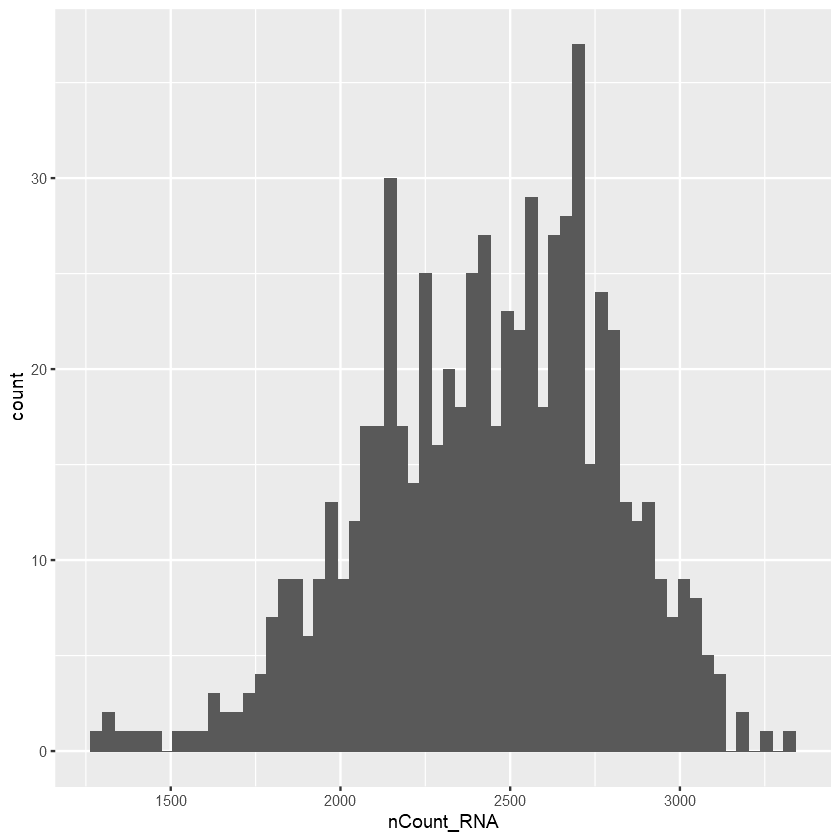

In [158]:
HistDataN = data.frame(nCount_RNA=colSums(as.matrix(data.filtN[["RNA"]]@data)))
ggplot(HistDataN, aes(nCount_RNA))+ geom_histogram(bins=60)

HistDataT = data.frame(nCount_RNA=colSums(as.matrix(data.filtT[["RNA"]]@data)))
ggplot(HistDataT, aes(nCount_RNA))+ geom_histogram(bins=60)

# Merge Normalized Seurat Objects


In [159]:
data.comb <- merge(data.filtN , y = data.filtT, add.cell.ids = c("N", "T"), project = "SingleCellCombined", 
    merge.data = TRUE)
dim(data.comb)
head(data.comb@meta.data)
tail(data.comb@meta.data)

[1] 33694  1524

,orig.ident,nCount_RNA,nFeature_RNA,doublet_class,feature_outliers,UMI_outliers,mit_outliers,final_outliers
,<chr>,<dbl>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
N_AAACCGTGATCGAC-1,SingleCellNormal,589,358,singlet,FALSE,FALSE,FALSE,FALSE
N_AAACGCACCAGAAA-1,SingleCellNormal,514,249,singlet,FALSE,FALSE,FALSE,FALSE
N_AAACGGCTAAAGTG-1,SingleCellNormal,809,394,singlet,FALSE,FALSE,FALSE,FALSE
N_AAACGGCTGTATGC-1,SingleCellNormal,668,393,singlet,FALSE,FALSE,FALSE,FALSE
N_AAAGACGAGACACT-1,SingleCellNormal,1316,628,singlet,FALSE,FALSE,FALSE,FALSE
N_AAAGCAGAACTAGC-1,SingleCellNormal,1514,588,singlet,FALSE,FALSE,FALSE,FALSE


,orig.ident,nCount_RNA,nFeature_RNA,doublet_class,feature_outliers,UMI_outliers,mit_outliers,final_outliers
,<chr>,<dbl>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>
T_TTTCACGAAGCCAT-1,SingleCellTumor,2997,1166,NA,FALSE,FALSE,FALSE,FALSE
T_TTTCAGTGAGTCAC-1,SingleCellTumor,6576,1869,NA,FALSE,FALSE,FALSE,FALSE
T_TTTCCAGAAAACAG-1,SingleCellTumor,9027,1959,NA,FALSE,FALSE,FALSE,FALSE
T_TTTCTACTAACGGG-1,SingleCellTumor,5816,1666,NA,FALSE,FALSE,FALSE,FALSE
T_TTTGCATGAAGTGA-1,SingleCellTumor,2972,1041,NA,FALSE,FALSE,FALSE,FALSE
T_TTTGCATGCTGTCC-1,SingleCellTumor,9308,2484,NA,FALSE,FALSE,FALSE,FALSE


In [160]:
data.frame(data.comb[["RNA"]]@data )

,N_AAACCGTGATCGAC.1,N_AAACGCACCAGAAA.1,N_AAACGGCTAAAGTG.1,N_AAACGGCTGTATGC.1,N_AAAGACGAGACACT.1,N_AAAGCAGAACTAGC.1,N_AAAGCAGACTGTTT.1,N_AAAGGCCTCTACGA.1,N_AAATGTTGCTGATG.1,N_AAATTGACGAACTC.1,⋯,T_TTGGGAACTGGTCA.1,T_TTGTCATGCTCGAA.1,T_TTTAGCTGCTGCAA.1,T_TTTATCCTAATGCC.1,T_TTTCACGAAGCCAT.1,T_TTTCAGTGAGTCAC.1,T_TTTCCAGAAAACAG.1,T_TTTCTACTAACGGG.1,T_TTTGCATGAAGTGA.1,T_TTTGCATGCTGTCC.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FO538757.2,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
LINC00115,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,⋯,1.147867,0.000000,1.343821,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
NOC2L,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,⋯,0.000000,0.000000,0.000000,1.191815,1.467107,0.0000000,0.0000000,0.000000,0.000000,1.1469863
PLEKHN1,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
HES4,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,⋯,0.000000,1.110485,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
ISG15,0.000000,0,0,0.000000,0.000000,2.028809,0,0,0,0,⋯,1.147867,0.000000,0.000000,0.000000,0.000000,1.3965819,0.0000000,0.000000,0.000000,0.0000000
AGRN,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
C1orf159,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.0000000,0.000000,0.000000,0.0000000
RP11-465B22.8,0.000000,0,0,0.000000,0.000000,0.000000,0,0,0,0,⋯,0.000000,0.000000,0.000000,0.000000,0.000000,0.9245292,0.0000000,0.000000,0.000000,0.0000000


# Find DEGs

In [161]:
# selcect 2000 most variable genes 
data.comb = FindVariableFeatures(data.comb, selection.method = "vst", nfeatures = 2000)

NB: FindVariableFeatures() uses a variance stabilizing transformation as default to account for technical noise (Heteroscedasticity) 
Reference: *Brennecke, P., Anders, S., Kim, J. et al. Accounting for technical noise in single-cell RNA-seq experiments. Nat Methods 10, 1093–1095 (2013). https://doi.org/10.1038/nmeth.2645*

In [162]:
length(VariableFeatures(data.comb))

[1] 2000

In [163]:
head(HVFInfo(data.comb))

,mean,variance,variance.standardized
,<dbl>,<dbl>,<dbl>
FO538757.2,0.003280840,0.003272223,0.9381792
LINC00115,0.010498688,0.010395286,0.8902518
NOC2L,0.236876640,0.339781702,0.8088186
PLEKHN1,0.007217848,0.007170455,0.9070546
HES4,0.150262467,0.299796385,1.3128432
ISG15,0.364829396,1.186575742,1.5348182


Genes with high standardized variance are selected

In [165]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(data.comb), 10)
top10

[1] "IGKC"   "IGHA2"  "IGHA1"  "ZG16"   "REG1A"  "JCHAIN" "FABP1"  "C1QA"  
 [9] "DUOXA2" "OLFM4"

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
"Transformation introduced infinite values in continuous x-axis"
Warning message:
"Removed 17203 rows containing missing values (geom_point)."


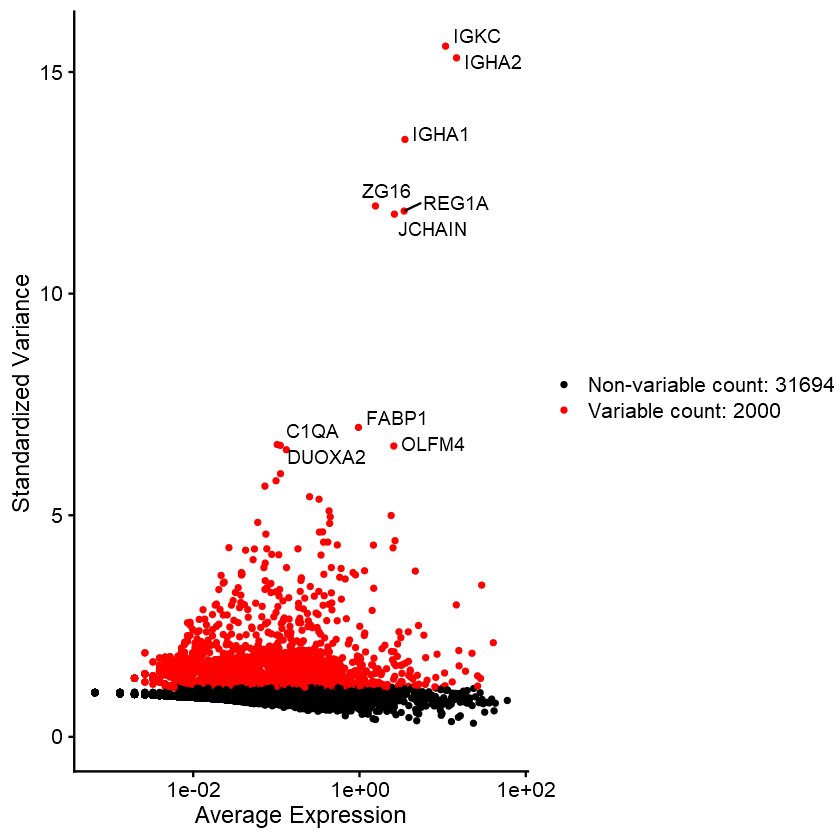

In [166]:
plot1 <- VariableFeaturePlot(data.comb)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

# Scaling the data

Shifts the expression of each gene, so that the mean expression across cells is 0
Scales the expression of each gene, so that the variance across cells is 1
This step gives equal weight in downstream analyses, so that highly-expressed genes do not dominate

In [167]:
all.genes <- rownames(data.comb)
data.comb <- ScaleData(data.comb, features = all.genes)

Centering and scaling data matrix



In [ ]:
##if scaling takes too long, we can alternatively scale only the genes that will be used as input to PCA (top 2000 DEGs). 
##To do this, omit the features argument in the previous function call, i.e.

#data.comb <- ScaleData(data.comb)

In [168]:
# The results of scaling are stored in 
head(data.comb[["RNA"]]@scale.data)

,N_AAACCGTGATCGAC-1,N_AAACGCACCAGAAA-1,N_AAACGGCTAAAGTG-1,N_AAACGGCTGTATGC-1,N_AAAGACGAGACACT-1,N_AAAGCAGAACTAGC-1,N_AAAGCAGACTGTTT-1,N_AAAGGCCTCTACGA-1,N_AAATGTTGCTGATG-1,N_AAATTGACGAACTC-1,⋯,T_TTGGGAACTGGTCA-1,T_TTGTCATGCTCGAA-1,T_TTTAGCTGCTGCAA-1,T_TTTATCCTAATGCC-1,T_TTTCACGAAGCCAT-1,T_TTTCAGTGAGTCAC-1,T_TTTCCAGAAAACAG-1,T_TTTCTACTAACGGG-1,T_TTTGCATGAAGTGA-1,T_TTTGCATGCTGTCC-1
FO538757.2,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,⋯,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265,-0.05235265
LINC00115,-0.08823867,-0.08823867,-0.08823867,-0.08823867,-0.08823867,-0.08823867,-0.08823867,-0.08823867,-0.08823867,-0.08823867,⋯,10.00000000,-0.08823867,10.00000000,-0.08823867,-0.08823867,-0.08823867,-0.08823867,-0.08823867,-0.08823867,-0.08823867
NOC2L,-0.39702122,-0.39702122,-0.39702122,-0.39702122,-0.39702122,-0.39702122,-0.39702122,-0.39702122,-0.39702122,-0.39702122,⋯,-0.39702122,-0.39702122,-0.39702122,1.75881416,2.25678092,-0.39702122,-0.39702122,-0.39702122,-0.39702122,1.67772526
PLEKHN1,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,⋯,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085,-0.07574085
HES4,-0.29626250,-0.29626250,-0.29626250,-0.29626250,-0.29626250,-0.29626250,-0.29626250,-0.29626250,-0.29626250,-0.29626250,⋯,-0.29626250,2.97500122,-0.29626250,-0.29626250,-0.29626250,-0.29626250,-0.29626250,-0.29626250,-0.29626250,-0.29626250
ISG15,-0.43534042,-0.43534042,-0.43534042,-0.43534042,-0.43534042,2.36713087,-0.43534042,-0.43534042,-0.43534042,-0.43534042,⋯,1.15025214,-0.43534042,-0.43534042,-0.43534042,-0.43534042,1.49381189,-0.43534042,-0.43534042,-0.43534042,-0.43534042


# PCA 

In [169]:
data.comb <- RunPCA(data.comb, features = VariableFeatures(object = data.comb)) 

PC_ 1 
Positive:  KRT18, AGR2, GPX2, IFI27, CEACAM5, S100A6, ANXA2, KRT8, LGALS3, KRT19 
	   S100A14, LGALS4, TFF3, FAM3D, CLDN4, CLDN3, TXN, SOD3, FXYD3, S100A10 
	   S100A11, TSPAN8, S100A16, TSPAN1, TMEM141, PIGR, TUBB4B, PHLDA2, UQCRQ, LYZ 
Negative:  TRAC, VIM, TRBC2, CCL5, HLA-DPA1, HLA-DPB1, LTB, SRGN, CD74, RGS1 
	   TRBC1, HLA-DRA, HLA-DRB1, GZMA, CD2, TRGC2, CD69, CD79A, HLA-DQB1, TRAF3IP3 
	   HLA-DQA1, IGKC, NKG7, GMFG, IL32, HOPX, CD27, JAML, TRDC, HLA-DRB5 
PC_ 2 
Positive:  FCGBP, VSIG2, REG4, TCEA3, FAM3D, SPINK4, KLK1, TFF1, S100P, LEFTY1 
	   WFDC2, NPDC1, ZG16B, SLC44A4, TSPAN1, GSN, PHGR1, FXYD3, ID1, CKB 
	   REP15, KLK11, MLPH, KRT19, ST6GALNAC1, FHL2, SERINC2, RETNLB, TPSG1, KRT20 
Negative:  CCNB1, CENPW, PTTG1, HULC, CDC20, CDKN3, CCNB2, CDCA3, UBE2C, CKS2 
	   AURKB, BIRC5, TPX2, TROAP, PBK, RPL22L1, CENPA, MKI67, NUSAP1, AURKA 
	   TK1, RRM2, PLK1, KPNA2, CENPF, CCNA2, SYN3, GAL, KNSTRN, DDX39A 
PC_ 3 
Positive:  MS4A6A, C1QC, C1QA, FCER1G, C1QB, AIF1, APOE, 

### Examine and visualize PCA results

#### VizDimReduction()

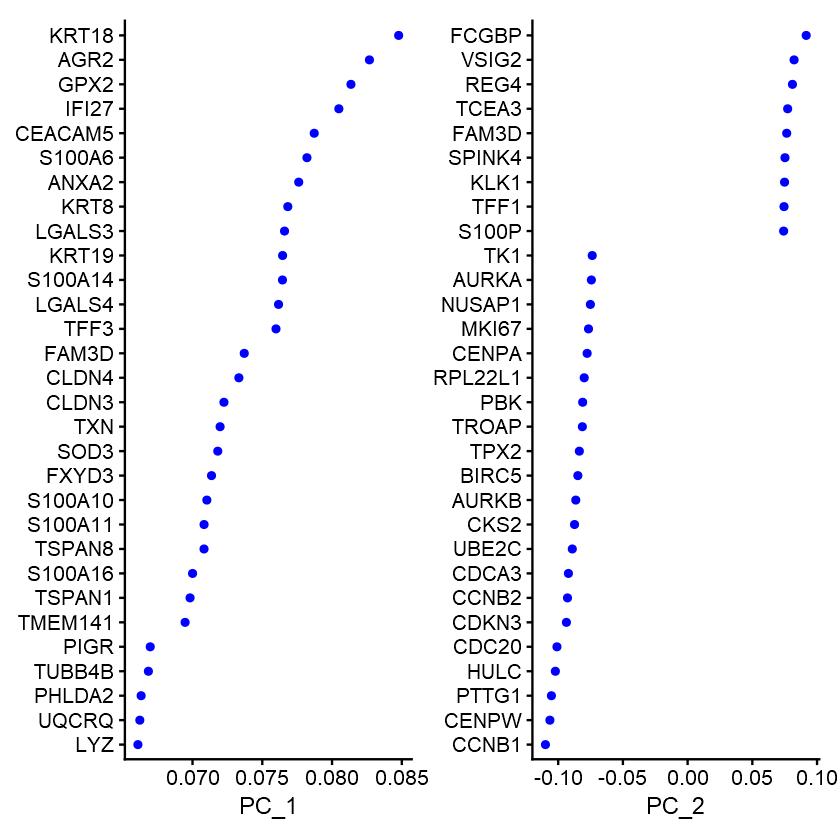

In [170]:
VizDimLoadings(data.comb, dims = 1:2, reduction = "pca")

#### DimPlot

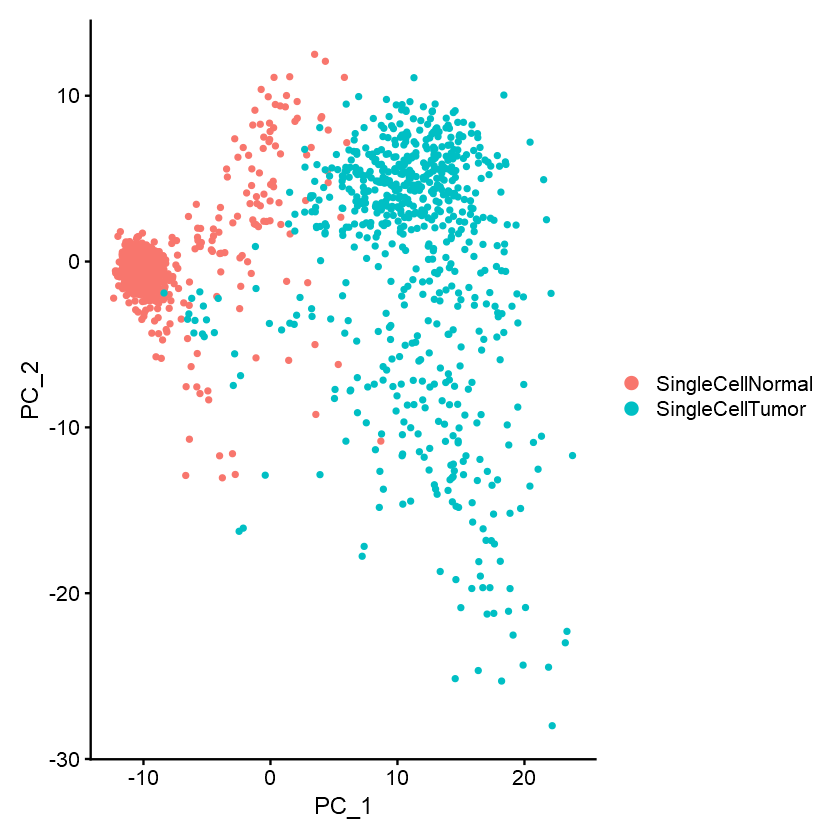

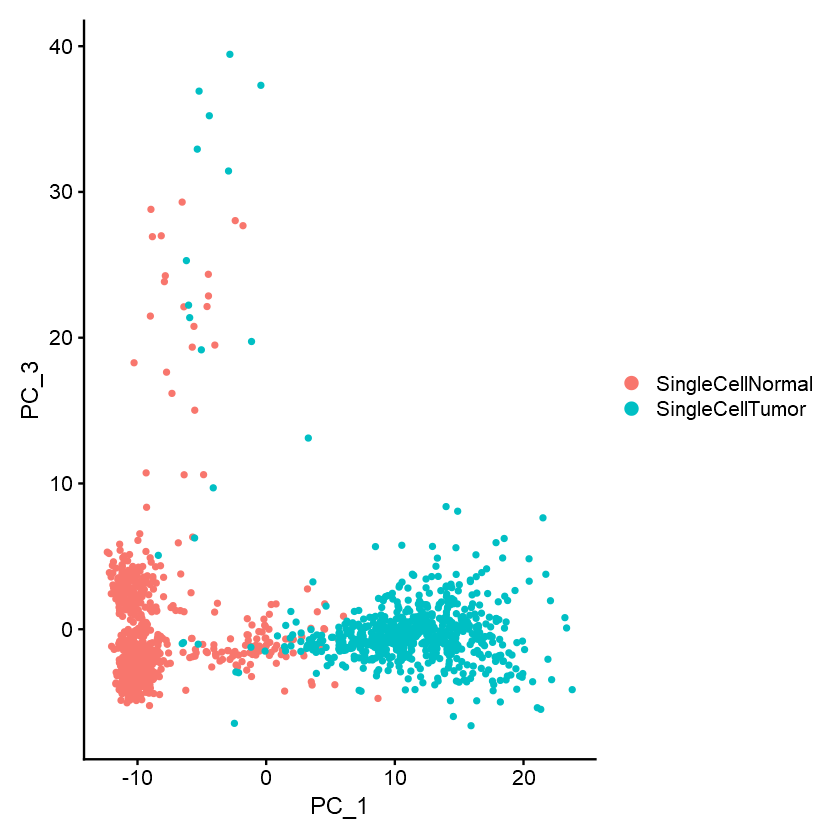

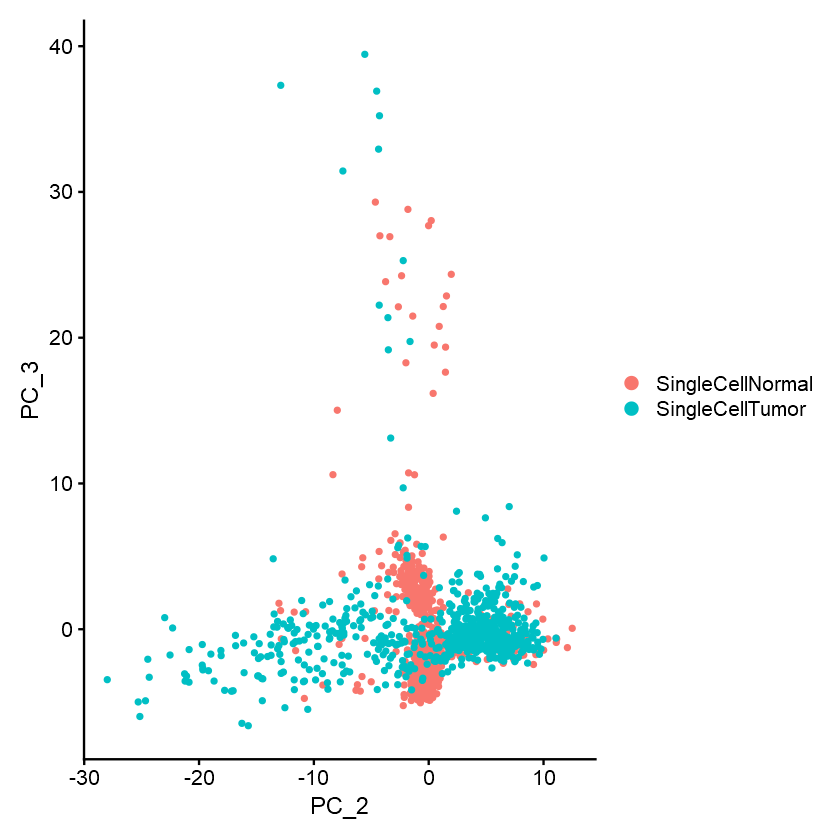

In [171]:
DimPlot(data.comb, reduction = "pca")
DimPlot(object = data.comb, dims = c(1, 3), reduction = "pca")
DimPlot(object = data.comb, dims = c(2, 3), reduction = "pca")

PC1 and PC2 cluster the cells according to Normal/ Tumor

#### Heatmaps

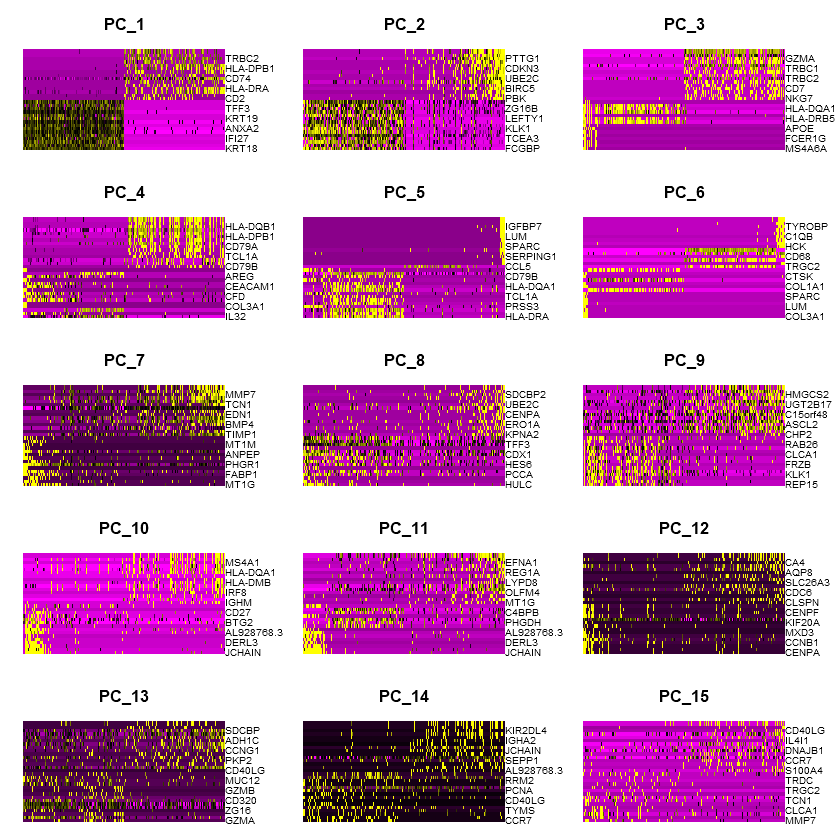

In [172]:
DimHeatmap(data.comb, dims = 1:15, cells = 500, balanced = TRUE)

### Choosing significant PCs

1) JackStraw Procedure

Warning message:
"Removed 21000 rows containing missing values (geom_point)."


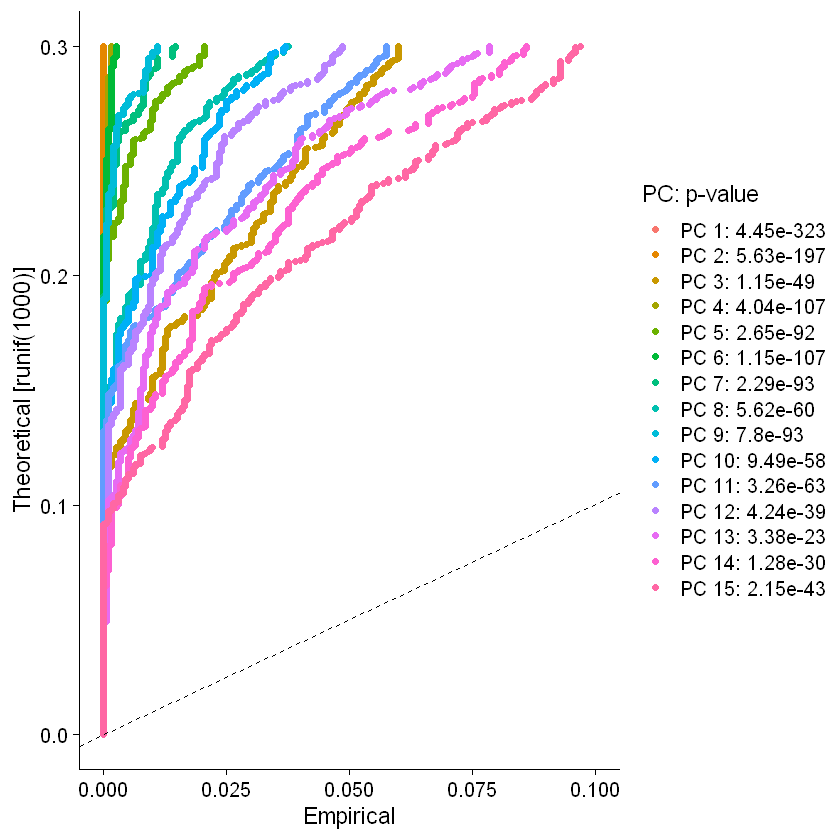

In [243]:
##Determine the ‘dimensionality’ of the dataset
##1) JackStraw procedure: randomly permute a subset of the data (1% by default) and rerun PCA, constructing a 
##‘null distribution’ of feature scores, and repeat this procedure. We identify ‘significant’ PCs as those who 
##have a strong enrichment of low p-value features.
##NOTE: This process can take a long time for big datasets, comment out for expediency. More
##approximate techniques such as those implemented in ElbowPlot() can be used to reduce computation time

data.comb <- JackStraw(data.comb, num.replicate = 100)
data.comb <- ScoreJackStraw(data.comb, dims = 1:20)
JackStrawPlot(data.comb, dims = 1:15)

2) Elbow Plot


In [76]:
#data.comb.sce = as.SingleCellExperiment(data.comb)
#percent.var <- attr(reducedDim(data.comb.sce), "percentVar")
#chosen.elbow <- findElbowPoint(percent.var)
#chosen.elbow


ERROR: Error in -variance: invalid argument to unary operator


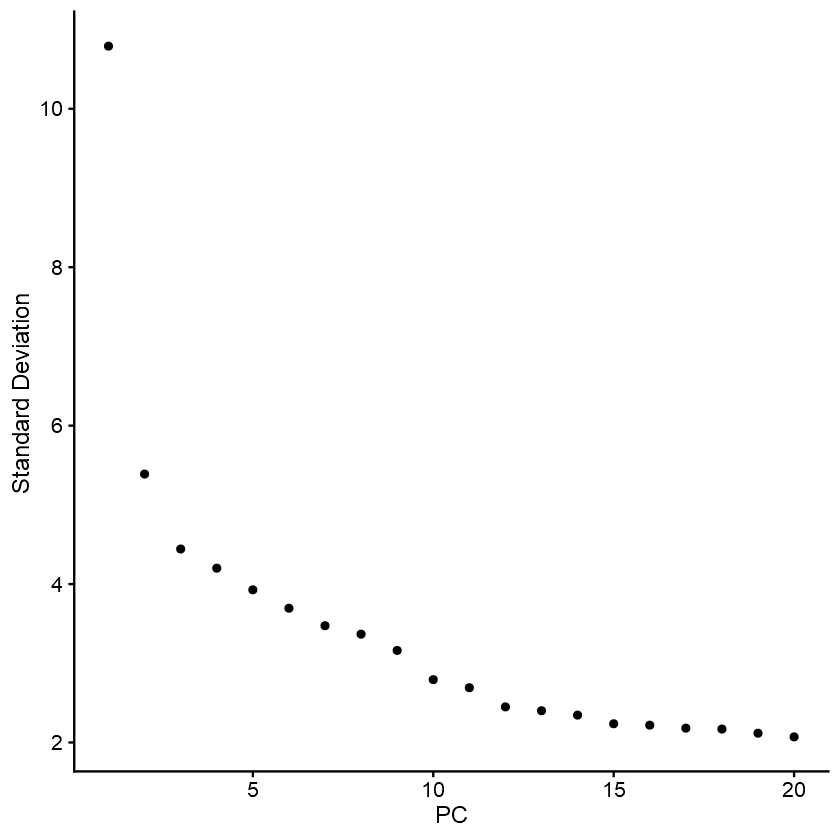

In [173]:
## Elbow plot: ranking of principle components based on the percentage of variance explained by each one(ElbowPlot()function)
ElbowPlot(data.comb)

We can observe an ‘elbow’ around PC14-15, suggesting that the majority of true signal is captured in the first 15 PCs

#### 3) Using maxLikGlobalDimEst()
(Estimates the intrinsic dimension of a data set using models of translated Poisson distributions.)

In [175]:
library(intrinsicDimension)

In [178]:
 x <- Embeddings(data.comb[["pca"]])
head(x)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
N_AAACCGTGATCGAC-1,-10.147405,0.18509200,-2.6736059,0.3774213,-0.3396210,-0.1999235,-0.4353282,-0.4868774,-0.31979842,0.37396542,⋯,-1.39129866,1.4211654,0.7052256,0.9228931,0.8473095,-0.61062699,1.0775733,0.2738825,0.007995428,0.08854277
N_AAACGCACCAGAAA-1,-9.322267,0.35686140,0.1079646,-0.8142852,0.3639334,2.4197381,-0.9892867,0.8739458,-1.84066620,0.86653184,⋯,-0.04403038,0.4266704,-1.2824580,-2.6528535,-1.0425618,-1.34667389,-1.7058787,1.4794782,-1.078383464,0.07938812
N_AAACGGCTAAAGTG-1,-9.300849,-0.31219074,-1.9194096,1.1902898,-0.6738952,-0.2089183,-0.1486847,0.9663708,0.05208738,0.53981511,⋯,0.88054388,-1.0777290,1.1421133,-0.2936114,0.4929450,-1.22757763,0.4777313,1.2564844,-0.254399105,0.83293197
N_AAACGGCTGTATGC-1,-9.454440,-0.02512809,-3.3981334,1.8095773,-2.0571480,-2.4214502,-0.2006948,-0.2845725,-0.47988430,-0.57332199,⋯,0.35982305,0.5419190,0.2150679,-1.2676068,-1.2118281,0.91560792,-0.9696433,1.5389622,-0.521726162,-1.56021114
N_AAAGACGAGACACT-1,-7.689676,-0.90159382,-1.0320694,0.5130472,0.1307567,-1.3308510,-1.7906034,0.3280797,0.74193766,0.07660611,⋯,1.11679242,1.5434466,-0.7051698,0.3080655,-1.3998349,0.22889595,1.3826654,0.6688117,-0.957597860,-1.02814742
N_AAAGCAGAACTAGC-1,-9.329633,-1.75367376,10.7277713,-3.6794456,0.6189567,-4.0490445,0.2051407,0.4520556,1.87170512,-1.11784336,⋯,-0.26436167,1.5199695,-0.7865082,-0.1520938,0.6195524,0.07372189,2.2093222,-2.0215455,-1.360028911,-0.99903210


In [177]:
maxLikGlobalDimEst(x, k=20, unbiased=TRUE)


Dimension estimate: 12.0378

# Clustering 

In [179]:
data.comb <- FindNeighbors(data.comb, dims = 1:12)
data.comb <- FindClusters(data.comb, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1524
Number of edges: 49759

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8945
Number of communities: 11
Elapsed time: 0 seconds


In [181]:
head(Idents(data.comb))

N_AAACCGTGATCGAC-1 N_AAACGCACCAGAAA-1 N_AAACGGCTAAAGTG-1 N_AAACGGCTGTATGC-1 
                 4                  4                  4                  0 
N_AAAGACGAGACACT-1 N_AAAGCAGAACTAGC-1 
                 4                  3 
Levels: 0 1 2 3 4 5 6 7 8 9 10

# Run non-linear dimensional reduction (UMAP/tSNE)

Similar cells are placed together in low-dimensional space

Cells within the graph-based clusters determined above should co-localize on these dimension reduction plots

In [182]:
reticulate::py_install(packages ='umap-learn')

In [183]:
data.comb <- RunUMAP(data.comb, dims = 1:12)

00:10:10 UMAP embedding parameters a = 0.9922 b = 1.112

00:10:10 Read 1524 rows and found 12 numeric columns

00:10:10 Using Annoy for neighbor search, n_neighbors = 30

00:10:10 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:10:10 Writing NN index file to temp file C:\Users\marwa\AppData\Local\Temp\Rtmp4gKrJ0\file9642ad03cdf

00:10:10 Searching Annoy index using 1 thread, search_k = 3000

00:10:11 Annoy recall = 100%

00:10:11 Commencing smooth kNN distance calibration using 1 thread

00:10:12 Initializing from normalized Laplacian + noise

00:10:12 Commencing optimization for 500 epochs, with 59818 positive edges

00:10:16 Optimization finished



### UMAP plot

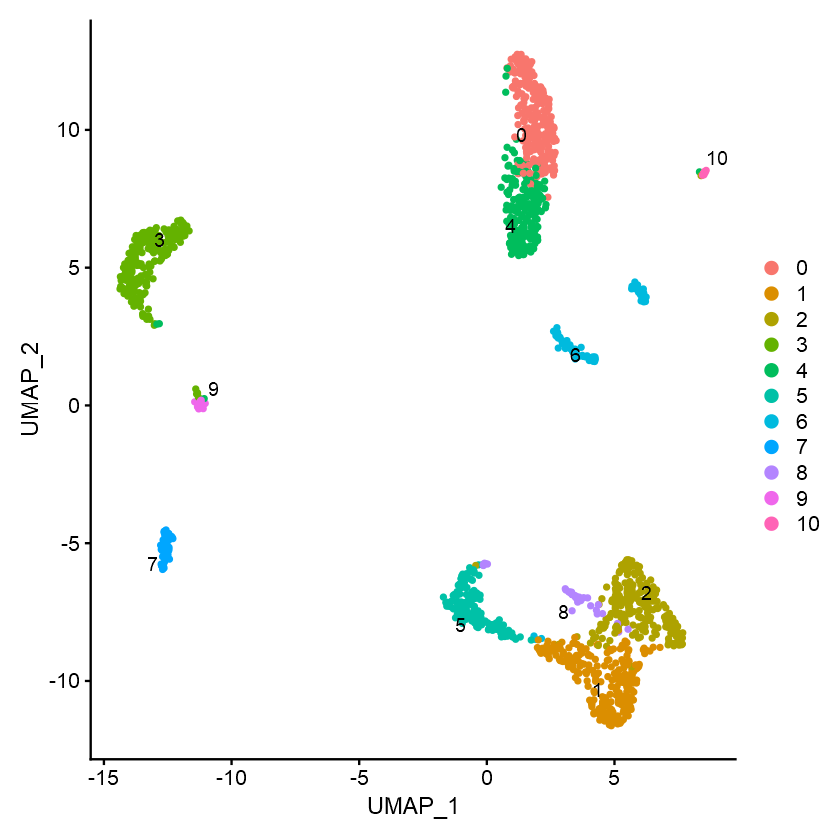

In [184]:
# note that you can set `label = TRUE` or use the LabelClusters function to help label individual clusters
umapPlot = DimPlot(data.comb, reduction = "umap")
LabelClusters(plot = umapPlot, id = 'ident')

In [185]:
#plot another UMAP plot with Normal/Tumor as identitiy labels and compare both

data.comb$CellClusters <- Idents(data.comb)
data.comb@meta.data


,orig.ident,nCount_RNA,nFeature_RNA,doublet_class,feature_outliers,UMI_outliers,mit_outliers,final_outliers,RNA_snn_res.0.5,seurat_clusters,CellClusters
,<chr>,<dbl>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<fct>,<fct>
N_AAACCGTGATCGAC-1,SingleCellNormal,589,358,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4
N_AAACGCACCAGAAA-1,SingleCellNormal,514,249,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4
N_AAACGGCTAAAGTG-1,SingleCellNormal,809,394,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4
N_AAACGGCTGTATGC-1,SingleCellNormal,668,393,singlet,FALSE,FALSE,FALSE,FALSE,0,0,0
N_AAAGACGAGACACT-1,SingleCellNormal,1316,628,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4
N_AAAGCAGAACTAGC-1,SingleCellNormal,1514,588,singlet,FALSE,FALSE,FALSE,FALSE,3,3,3
N_AAAGCAGACTGTTT-1,SingleCellNormal,683,342,singlet,FALSE,FALSE,FALSE,FALSE,3,3,3
N_AAAGGCCTCTACGA-1,SingleCellNormal,1169,587,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4
N_AAATGTTGCTGATG-1,SingleCellNormal,469,282,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4


In [186]:
Idents(data.comb) <- "orig.ident"
data.comb@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,doublet_class,feature_outliers,UMI_outliers,mit_outliers,final_outliers,RNA_snn_res.0.5,seurat_clusters,CellClusters
,<chr>,<dbl>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<fct>,<fct>,<fct>
N_AAACCGTGATCGAC-1,SingleCellNormal,589,358,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4
N_AAACGCACCAGAAA-1,SingleCellNormal,514,249,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4
N_AAACGGCTAAAGTG-1,SingleCellNormal,809,394,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4
N_AAACGGCTGTATGC-1,SingleCellNormal,668,393,singlet,FALSE,FALSE,FALSE,FALSE,0,0,0
N_AAAGACGAGACACT-1,SingleCellNormal,1316,628,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4
N_AAAGCAGAACTAGC-1,SingleCellNormal,1514,588,singlet,FALSE,FALSE,FALSE,FALSE,3,3,3
N_AAAGCAGACTGTTT-1,SingleCellNormal,683,342,singlet,FALSE,FALSE,FALSE,FALSE,3,3,3
N_AAAGGCCTCTACGA-1,SingleCellNormal,1169,587,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4
N_AAATGTTGCTGATG-1,SingleCellNormal,469,282,singlet,FALSE,FALSE,FALSE,FALSE,4,4,4


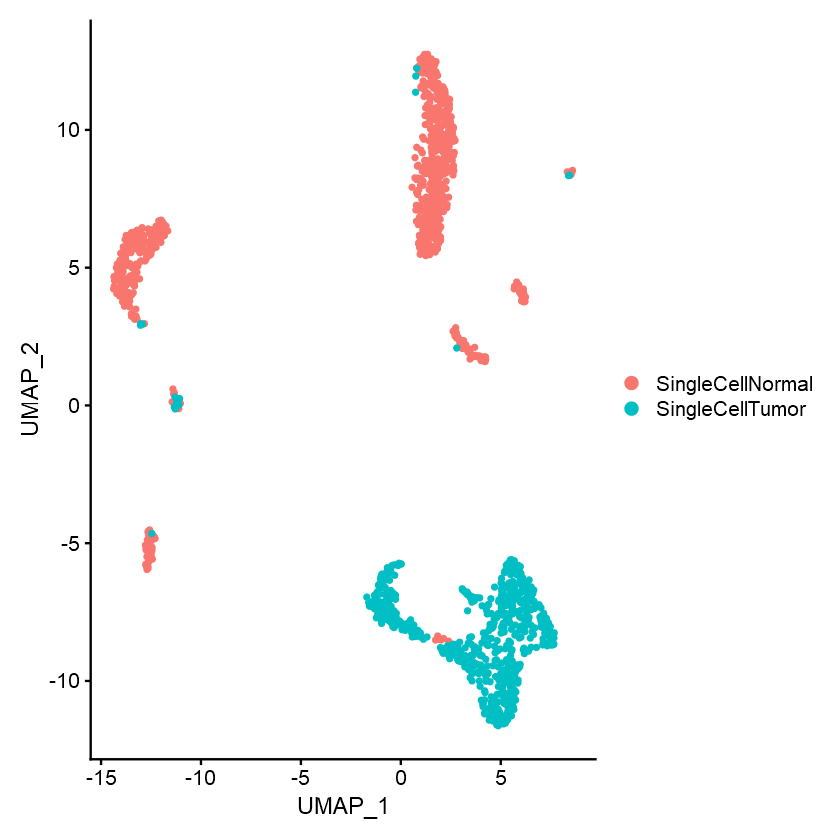

In [187]:
DimPlot(data.comb, reduction = "umap")

In [188]:
saveRDS(data.comb, "C:/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/results/UMAP2.rds")


### tSNE Plot

In [261]:
s_obj = RunTSNE(s_obj)
DimPlot (s_obj, reduction = "tsne", label = TRUE)

ERROR: Error: Cannot find 'tsne' in this Seurat object


# Labeling Clusters according to DEGs

### Method 1: scCATCH

In [195]:
install.packages(pkgs = 'devtools')
devtools::install_github('ZJUFanLab/scCATCH')


  There is a binary version available but the source version is later:
         binary source needs_compilation
devtools  2.4.2  2.4.3             FALSE



installing the source package 'devtools'


Skipping install of 'scCATCH' from a github remote, the SHA1 (011919a9) has not changed since last install.
  Use `force = TRUE` to force installation



In [197]:
library(scCATCH)

In [200]:
# for normal cells
clu_markers <- findmarkergenes(object = data.comb,
                               species = 'Human',
                               cluster = 'All',
                               match_CellMatch = TRUE,  #recommended TRUE for large datasets (> 10,000 cells or > 15 clusters)
                               cancer = "Colorectal Cancer",
                               tissue = "Colorectum",
                               cell_min_pct = 0.25,
                               logfc = 0.25,
                               pvalue = 0.05)

Note: the raw data matrix includes 1524 cells and 33694 genes. 

---Revising gene symbols according to NCBI Gene symbols (updated in June 19, 2020, https://www.ncbi.nlm.nih.gov/gene) and no matched genes and duplicated genes will be removed. 

Note: the new data matrix includes 1524 cells and 22249 genes. 



ERROR: Error in rep(clu_num[i], (length(clu_num) - 1)): invalid 'times' argument


In [ ]:
clu_ann <- scCATCH(object = clu_markers$clu_markers,
                   species = 'Human',
                   cancer = NULL,
                   tissue = 'Colorectum')


In [ ]:
clu_ann

### Method2 : scPred
Note: Requires a reference dataset

In [190]:
devtools::install_github("immunogenomics/harmony")

rlang  (0.4.11 -> 0.4.12) [CRAN]
tibble (3.1.5  -> 3.1.6 ) [CRAN]
glue   (1.4.2  -> 1.5.1 ) [CRAN]
digest (0.6.28 -> 0.6.29) [CRAN]
irlba  (2.3.3  -> 2.3.4 ) [CRAN]


Skipping 1 packages not available: SingleCellExperiment

Installing 5 packages: rlang, tibble, glue, digest, irlba




  There are binary versions available but the source versions are later:
       binary source needs_compilation
glue    1.5.0  1.5.1              TRUE
digest 0.6.28 0.6.29              TRUE
irlba   2.3.3  2.3.4              TRUE

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\marwa\anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\marwa\anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\marwa\anaconda3\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll to C:\Users\marwa\anaconda3\Lib\R\library\tibble\libs\x64\tibble.dll: Permission denied"
Warning message:
"restored 'tibble'"



The downloaded binary packages are in
	C:\Users\marwa\AppData\Local\Temp\Rtmp4gKrJ0\downloaded_packages


installing the source packages 'glue', 'digest', 'irlba'


Warning message in i.p(...):
"installation of package 'glue' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'digest' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'irlba' had non-zero exit status"


v  checking for file 'C:\Users\marwa\AppData\Local\Temp\Rtmp4gKrJ0\remotes9641d6061b6\immunogenomics-harmony-c93de54/DESCRIPTION' (1.3s)
-  preparing 'harmony': (920ms)
v  checking DESCRIPTION meta-information
-  cleaning src
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
-  building 'harmony_0.1.0.tar.gz'
   


Warning message in i.p(...):
"installation of package 'C:/Users/marwa/AppData/Local/Temp/Rtmp4gKrJ0/file9646e5e619c/harmony_0.1.0.tar.gz' had non-zero exit status"


In [191]:
devtools::install_github("powellgenomicslab/scPred")

harmony      (NA     -> c93de54ae...) [GitHub]
stringi      (1.7.4  -> 1.7.6       ) [CRAN]
glue         (1.4.2  -> 1.5.1       ) [CRAN]
rlang        (0.4.11 -> 0.4.12      ) [CRAN]
digest       (0.6.28 -> 0.6.29      ) [CRAN]
SQUAREM      (NA     -> 2021.1      ) [CRAN]
numDeriv     (NA     -> 2016.8-1.1  ) [CRAN]
progressr    (NA     -> 0.9.0       ) [CRAN]
lava         (NA     -> 1.6.10      ) [CRAN]
prodlim      (NA     -> 2019.11.13  ) [CRAN]
class        (NA     -> 7.3-19      ) [CRAN]
nnet         (NA     -> 7.3-16      ) [CRAN]
timeDate     (NA     -> 3043.102    ) [CRAN]
tibble       (3.1.5  -> 3.1.6       ) [CRAN]
lubridate    (NA     -> 1.8.0       ) [CRAN]
ipred        (NA     -> 0.9-12      ) [CRAN]
gower        (NA     -> 0.2.2       ) [CRAN]
iterators    (NA     -> 1.0.13      ) [CRAN]
proxy        (NA     -> 0.4-26      ) [CRAN]
recipes      (NA     -> 0.1.17      ) [CRAN]
pROC         (NA     -> 1.18.0      ) [CRAN]
ModelMetrics (NA     -> 1.2.2.2     ) [CRAN]
foreach 

rlang  (0.4.11 -> 0.4.12) [CRAN]
tibble (3.1.5  -> 3.1.6 ) [CRAN]
glue   (1.4.2  -> 1.5.1 ) [CRAN]
digest (0.6.28 -> 0.6.29) [CRAN]
irlba  (2.3.3  -> 2.3.4 ) [CRAN]


Skipping 1 packages not available: SingleCellExperiment

Installing 5 packages: rlang, tibble, glue, digest, irlba




  There are binary versions available but the source versions are later:
       binary source needs_compilation
glue    1.5.0  1.5.1              TRUE
digest 0.6.28 0.6.29              TRUE
irlba   2.3.3  2.3.4              TRUE

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\marwa\anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\marwa\anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\marwa\anaconda3\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll to C:\Users\marwa\anaconda3\Lib\R\library\tibble\libs\x64\tibble.dll: Permission denied"
Warning message:
"restored 'tibble'"



The downloaded binary packages are in
	C:\Users\marwa\AppData\Local\Temp\Rtmp4gKrJ0\downloaded_packages


installing the source packages 'glue', 'digest', 'irlba'


Warning message in i.p(...):
"installation of package 'glue' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'digest' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'irlba' had non-zero exit status"


v  checking for file 'C:\Users\marwa\AppData\Local\Temp\Rtmp4gKrJ0\remotes9646aea5d44\immunogenomics-harmony-c93de54/DESCRIPTION'
-  preparing 'harmony': (1.1s)
v  checking DESCRIPTION meta-information
-  cleaning src
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
-  building 'harmony_0.1.0.tar.gz'
   


Warning message in i.p(...):
"installation of package 'C:/Users/marwa/AppData/Local/Temp/Rtmp4gKrJ0/file9647b876d4f/harmony_0.1.0.tar.gz' had non-zero exit status"
Installing 28 packages: stringi, glue, rlang, digest, SQUAREM, numDeriv, progressr, lava, prodlim, class, nnet, timeDate, tibble, lubridate, ipred, gower, iterators, proxy, recipes, pROC, ModelMetrics, foreach, e1071, irlba, kernlab, caret, MLmetrics, SeuratObject

Warning message:
"package 'SeuratObject' is in use and will not be installed"



  There are binary versions available but the source versions are later:
        binary source needs_compilation
stringi  1.7.5  1.7.6              TRUE
glue     1.5.0  1.5.1              TRUE
digest  0.6.28 0.6.29              TRUE
irlba    2.3.3  2.3.4              TRUE

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\marwa\anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\marwa\anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'SQUAREM' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'progressr' successfully unpacked and MD5 sums checked
package 'lava' successfully unpacked and MD5 sums checked
package 'prodlim' successfully unpacked and MD5 sums checked
package 'class' successfully unpacked and MD5 sums checked
package 'nnet' successfully unpacked and MD5 sums checked
package 'timeDate' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\marwa\anaconda3\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll to C:\Users\marwa\anaconda3\Lib\R\library\tibble\libs\x64\tibble.dll: Permission denied"
Warning message:
"restored 'tibble'"


package 'lubridate' successfully unpacked and MD5 sums checked
package 'ipred' successfully unpacked and MD5 sums checked
package 'gower' successfully unpacked and MD5 sums checked
package 'iterators' successfully unpacked and MD5 sums checked
package 'proxy' successfully unpacked and MD5 sums checked
package 'recipes' successfully unpacked and MD5 sums checked
package 'pROC' successfully unpacked and MD5 sums checked
package 'ModelMetrics' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'kernlab' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked
package 'MLmetrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marwa\AppData\Local\Temp\Rtmp4gKrJ0\downloaded_packages


installing the source packages 'stringi', 'glue', 'digest', 'irlba'


Warning message in i.p(...):
"installation of package 'stringi' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'glue' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'digest' had non-zero exit status"
Warning message in i.p(...):
"installation of package 'irlba' had non-zero exit status"

Skipping harmony, it is already being installed



v  checking for file 'C:\Users\marwa\AppData\Local\Temp\Rtmp4gKrJ0\remotes9643b9790d\powellgenomicslab-scPred-af5492e/DESCRIPTION' (697ms)
-  preparing 'scPred': (5.5s)
v  checking DESCRIPTION meta-information
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
     NB: this package now depends on R (>= 3.5.0)
-  building 'scPred_1.9.2.tar.gz'
   


Warning message in i.p(...):
"installation of package 'C:/Users/marwa/AppData/Local/Temp/Rtmp4gKrJ0/file9642f2e7280/scPred_1.9.2.tar.gz' had non-zero exit status"


In [194]:
library("scPred")
library("Seurat")
library("magrittr")

ERROR: Error in library("scPred"): there is no package called 'scPred'


# Finding DEGs


## 1. DEGs between cell clusters

## 2. DEGs between Normal and Tumor cells of each type/ cluster

In [74]:
# add column to metadata combining cluster and Normal/Tumor for each cell
data.comb$TissueType <- Idents(data.comb)
head(data.comb@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,CellClusters,TissueType
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
N_AAACCGTGATCGAC-1,SingleCellNormal,593,362,2.192243,23.94604,0,0,0.9227040,0,0,0,CellClusters_Tissue
N_AAACGCACCAGAAA-1,SingleCellNormal,514,249,0.000000,43.19066,0,0,0.8838923,0,0,0,CellClusters_Tissue
N_AAACGGCTAAAGTG-1,SingleCellNormal,809,394,1.977750,33.99258,0,0,0.8925523,0,0,0,CellClusters_Tissue
N_AAACGGCTGTATGC-1,SingleCellNormal,671,396,4.918033,21.16244,0,0,0.9189778,0,0,0,CellClusters_Tissue
N_AAAGACGAGACACT-1,SingleCellNormal,1318,630,1.365706,25.34143,0,0,0.8972489,0,0,0,CellClusters_Tissue
N_AAAGCAGAACTAGC-1,SingleCellNormal,1524,598,1.246719,29.00262,0,0,0.8723576,1,1,1,CellClusters_Tissue


In [307]:
data.comb@meta.data$CellClusters_Tissue = paste(data.comb@meta.data$CellClusters, data.comb@meta.data$TissueType, sep = "_")
head(data.comb@meta.data)
tail(data.comb@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,percent.hb,percent.plat,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,CellClusters,TissueType,CellClusters_Tissue
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
N_AAACATTGGCTCCT-1,SingleCellNormal,735,383,23.513514,5.675676,0,0,23.513514,5.675676,0,0,0.9012351,7,7,7,SingleCellNormal,7_SingleCellNormal
N_AAACCGTGATCGAC-1,SingleCellNormal,588,357,2.192243,23.946037,0,0,2.192243,23.946037,0,0,0.9217481,1,1,1,SingleCellNormal,1_SingleCellNormal
N_AAACGCACCAGAAA-1,SingleCellNormal,514,249,0.000000,43.190661,0,0,0.000000,43.190661,0,0,0.8838923,1,1,1,SingleCellNormal,1_SingleCellNormal
N_AAACGGCTAAAGTG-1,SingleCellNormal,809,394,1.977750,33.992583,0,0,1.977750,33.992583,0,0,0.8925523,1,1,1,SingleCellNormal,1_SingleCellNormal
N_AAACGGCTGTATGC-1,SingleCellNormal,664,389,4.918033,21.162444,0,0,4.918033,21.162444,0,0,0.9177163,4,4,4,SingleCellNormal,4_SingleCellNormal
N_AAAGACGAGACACT-1,SingleCellNormal,1315,627,1.365706,25.341426,0,0,1.365706,25.341426,0,0,0.8968689,1,1,1,SingleCellNormal,1_SingleCellNormal


,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,percent.ribo,percent.hb,percent.plat,percent_mt,percent_ribo,percent_hb,percent_plat,log10GenesPerUMI,RNA_snn_res.0.5,seurat_clusters,CellClusters,TissueType,CellClusters_Tissue
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
T_TTTCACGAAGCCAT-1,SingleCellTumor,2991,1160,11.0777444,29.56290,0,0.03336670,11.0777444,29.56290,0,0.03336670,0.8816513,0,0,0,SingleCellTumor,0_SingleCellTumor
T_TTTCAGTGAGTCAC-1,SingleCellTumor,6565,1858,11.8765207,26.36861,0,0.00000000,11.8765207,26.36861,0,0.00000000,0.8563911,2,2,2,SingleCellTumor,2_SingleCellTumor
T_TTTCCAGAAAACAG-1,SingleCellTumor,9022,1954,0.1883239,35.59322,0,0.03323363,0.1883239,35.59322,0,0.03323363,0.8320285,6,6,6,SingleCellTumor,6_SingleCellTumor
T_TTTCTACTAACGGG-1,SingleCellTumor,5812,1662,10.6258597,26.82256,0,0.00000000,10.6258597,26.82256,0,0.00000000,0.8555665,2,2,2,SingleCellTumor,2_SingleCellTumor
T_TTTGCATGAAGTGA-1,SingleCellTumor,2971,1040,11.0699865,28.97039,0,0.00000000,11.0699865,28.97039,0,0.00000000,0.8687354,2,2,2,SingleCellTumor,2_SingleCellTumor
T_TTTGCATGCTGTCC-1,SingleCellTumor,9297,2473,3.6635153,25.58015,0,0.04297379,3.6635153,25.58015,0,0.04297379,0.8550733,0,0,0,SingleCellTumor,0_SingleCellTumor


In [77]:
# Find DEGs between Normal and Tumor cells of each cluster
Idents(data.comb)='CellClusters_Tissue'
#at least 20% of the cells express the gene
markers_3 = FindMarkers(data.comb, ident.1 = '5_SingleCellTumor', ident.2 = '5_SingleCellNormal', logfc.threshold = 0, min.pct = 0)
write.csv(markers_1_2, 'C:/Users/marwa/OneDrive/Documents/R/Colorectal cancer stem cell states uncovered by simultaneous single-cell analysis of transcriptome and telomeres/results/markers_5.2.csv')

ERROR: Error in WhichCells.Seurat(object = object, idents = ident.1): Cannot find the following identities in the object: 5_SingleCellTumor
